In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df_s=pd.read_csv('Sparkling.csv')

In [3]:
df_s.dtypes

YearMonth    object
Sparkling     int64
dtype: object

In [4]:
df_s.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [5]:
df_s=pd.read_csv('Sparkling.csv', parse_dates = ['YearMonth'])

In [7]:
df_s.set_index('YearMonth',inplace=True,drop='YearMonth')

In [8]:
df_s.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

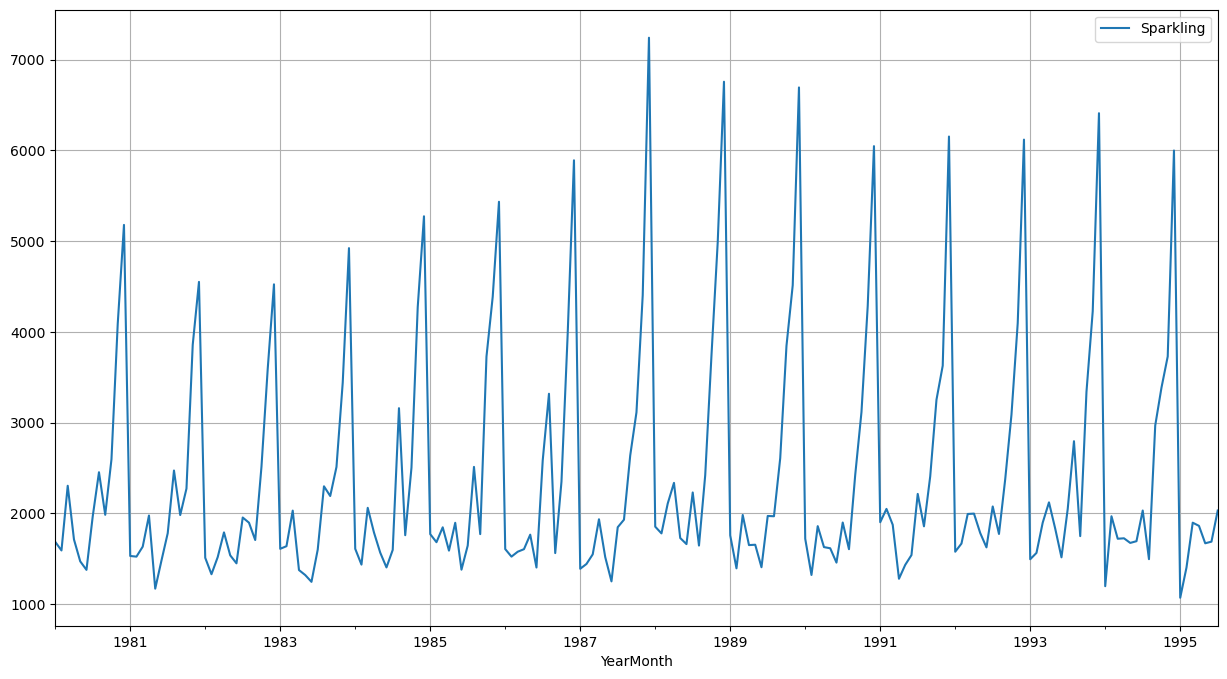

In [11]:
df_s.plot(grid=True);

In [12]:
round(df_s.describe(),3)

,Sparkling
count,187.000
mean,2402.417
std,1295.112
min,1070.000
25%,1605.000
50%,1874.000
75%,2549.000
max,7242.000


In [13]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [14]:
#Decompose the time series additively
df_s_add_decompose = seasonal_decompose(df_s, model = 'additive', period = 12)

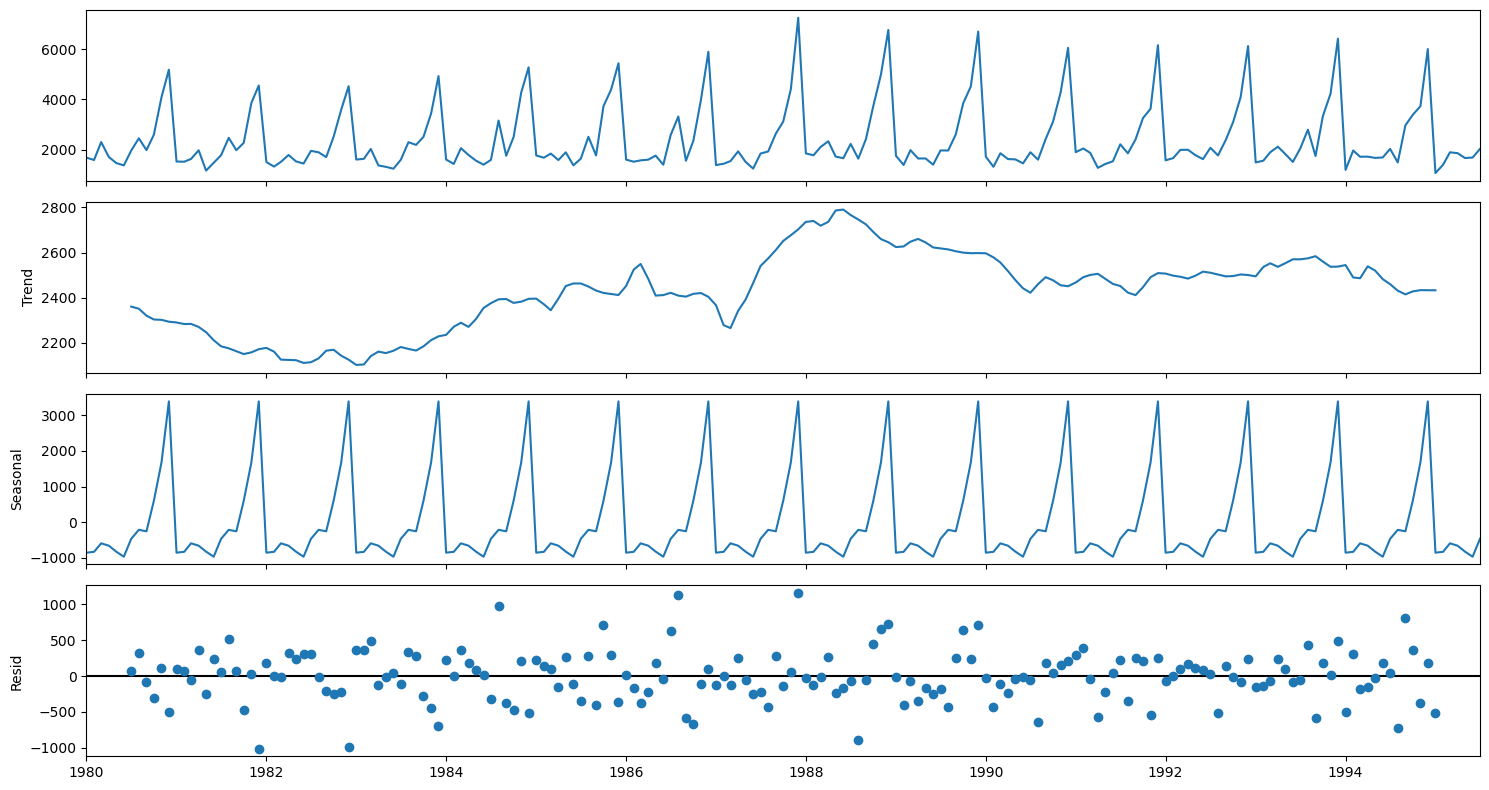

In [15]:
df_s_add_decompose.plot()
plt.show()

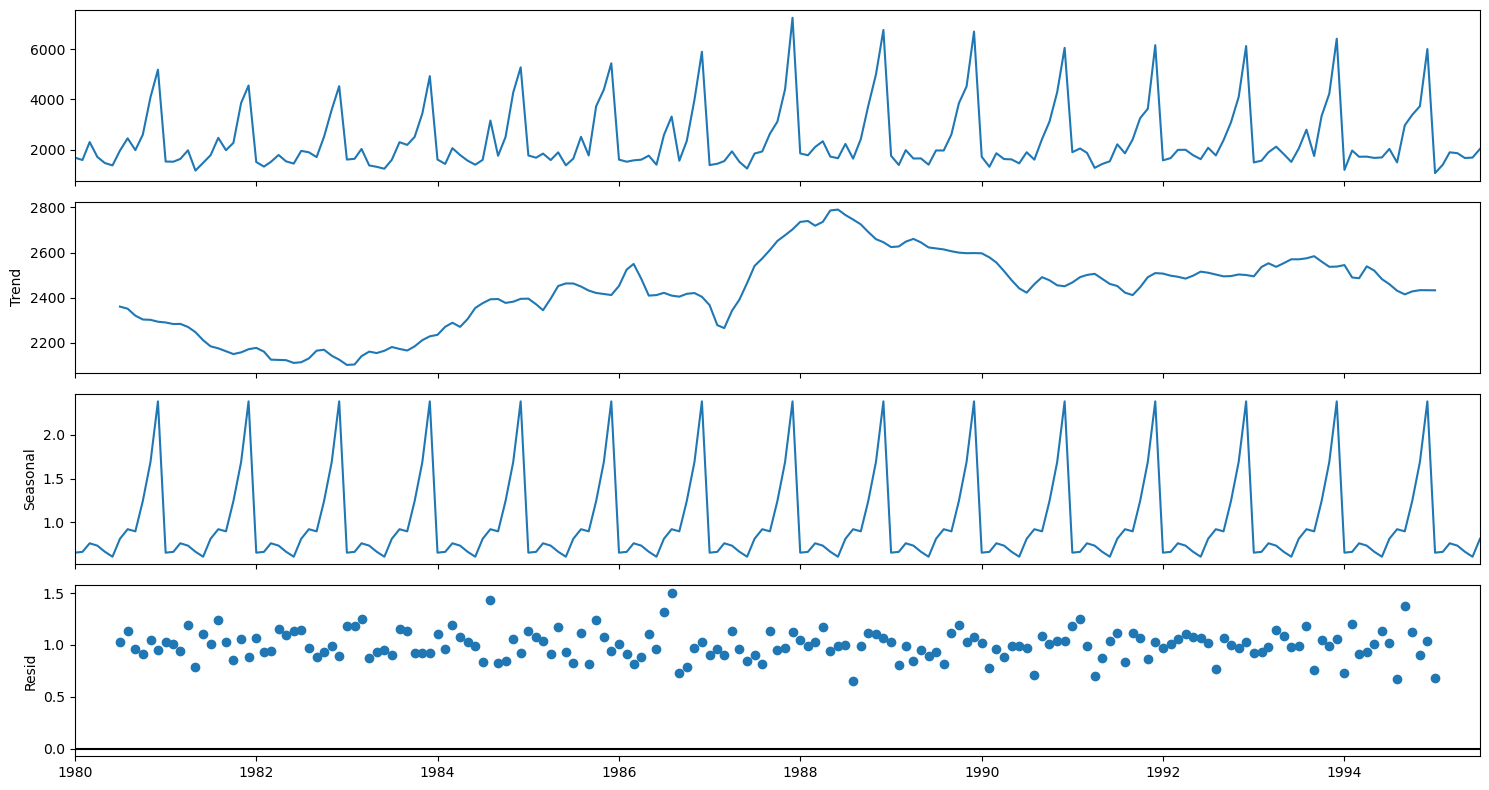

In [16]:
##Decompose the time series multiplicatively
df_s_mul_decompose = seasonal_decompose(df_s, model = "multiplicative")
df_s_mul_decompose.plot()
plt.show()

In [17]:
#Let's try to do log transformation
df_s_log = df_s.copy()

In [18]:
df_s_log['Sparkling'] = np.log(df_s)

In [19]:
df_s_log.Sparkling

YearMonth
1980-01-01    7.430114
1980-02-01    7.372118
1980-03-01    7.742402
1980-04-01    7.445418
1980-05-01    7.293698
                ...   
1995-03-01    7.548029
1995-04-01    7.529406
1995-05-01    7.420579
1995-06-01    7.431300
1995-07-01    7.616284
Name: Sparkling, Length: 187, dtype: float64

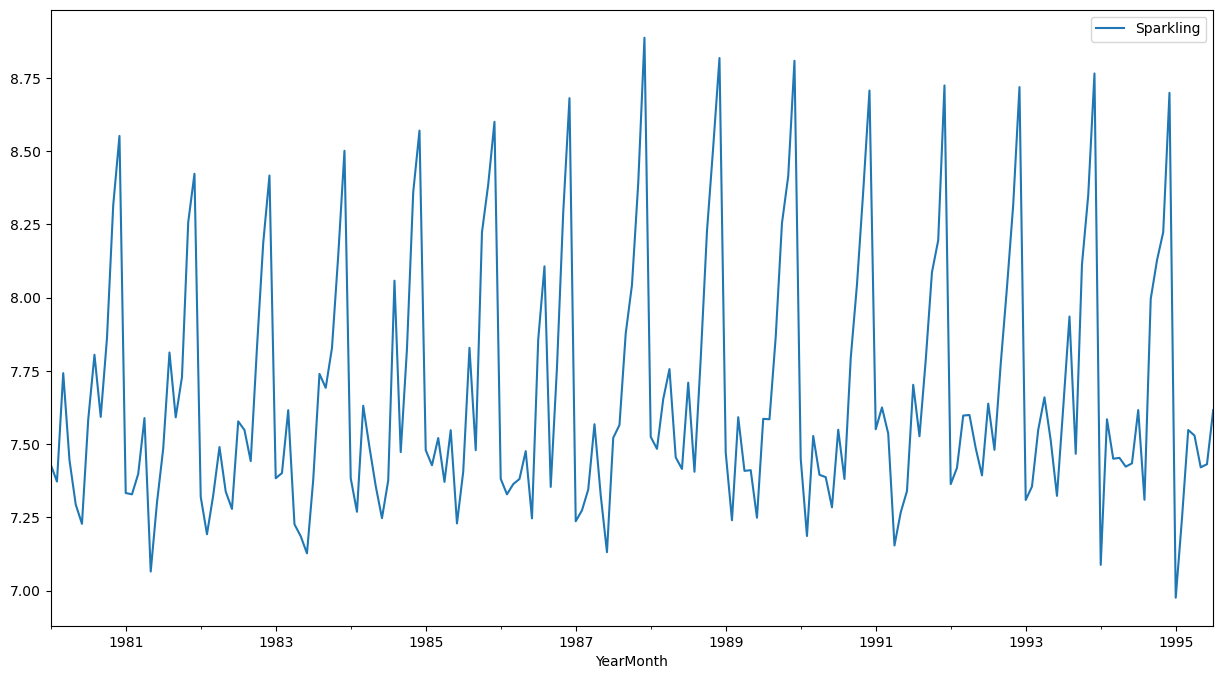

In [20]:
#Visualize the log transformed series
df_s_log.plot()
plt.show()

In [21]:
df_s_add_decompose.trend

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64

In [23]:
df_s_add_decompose.seasonal

YearMonth
1980-01-01   -854.260599
1980-02-01   -830.350678
1980-03-01   -592.356630
1980-04-01   -658.490559
1980-05-01   -824.416154
                 ...    
1995-03-01   -592.356630
1995-04-01   -658.490559
1995-05-01   -824.416154
1995-06-01   -967.434011
1995-07-01   -465.502265
Name: seasonal, Length: 187, dtype: float64

In [24]:
df_s_add_decompose.resid

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64

In [25]:
df_s_mul_decompose.trend

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64

In [26]:
df_s_mul_decompose.seasonal

YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
                ...   
1995-03-01    0.757440
1995-04-01    0.730351
1995-05-01    0.660609
1995-06-01    0.603468
1995-07-01    0.809164
Name: seasonal, Length: 187, dtype: float64

In [27]:
df_s_mul_decompose.resid

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64

In [28]:
df_s_q=df_s.resample('Q').mean()

<Axes: xlabel='YearMonth'>

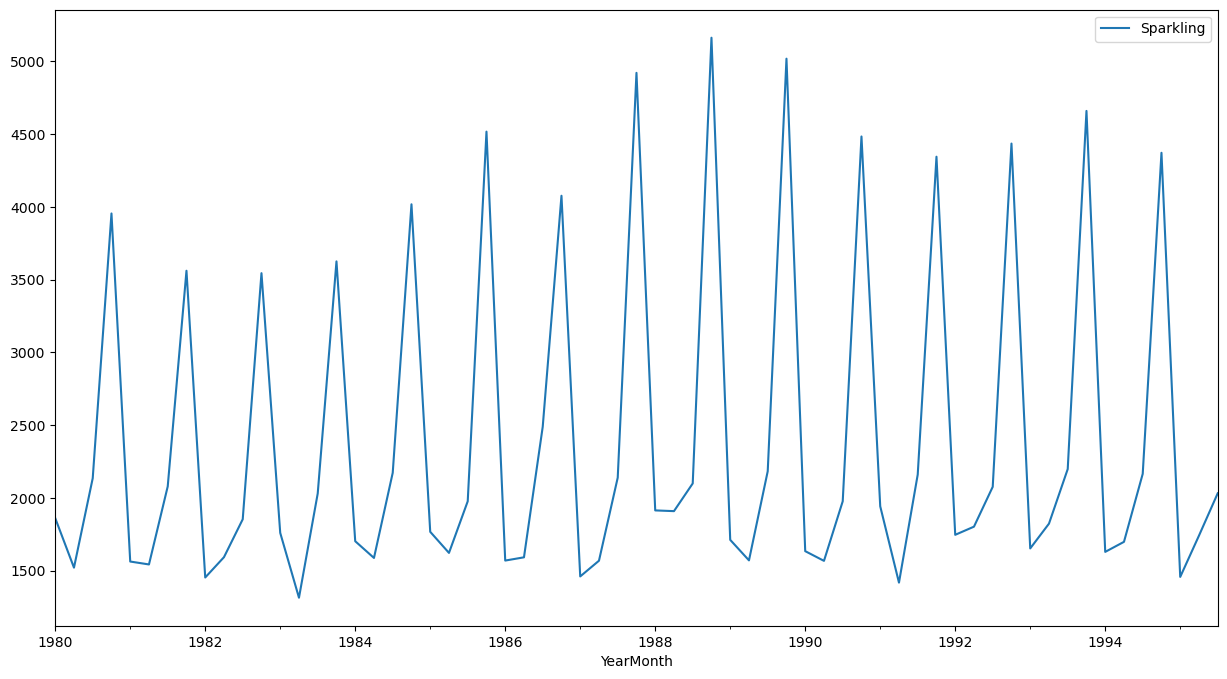

In [29]:
df_s_q.plot()

In [30]:
#Split the data into train and test and plot the training and test data.

In [32]:
train    =   df_s[0:int(len(df_s)*0.7)] 
test     =   df_s[int(len(df_s)*0.7):]

In [33]:
print(train.shape)
print(test.shape)

(130, 1)
(57, 1)


In [34]:
from IPython.display import display

In [35]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


Last few rows of Training Data


,Sparkling
YearMonth,
1990-06-01,1457
1990-07-01,1899
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116


First few rows of Test Data


,Sparkling
YearMonth,
1990-11-01,4286
1990-12-01,6047
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874


Last few rows of Test Data


,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


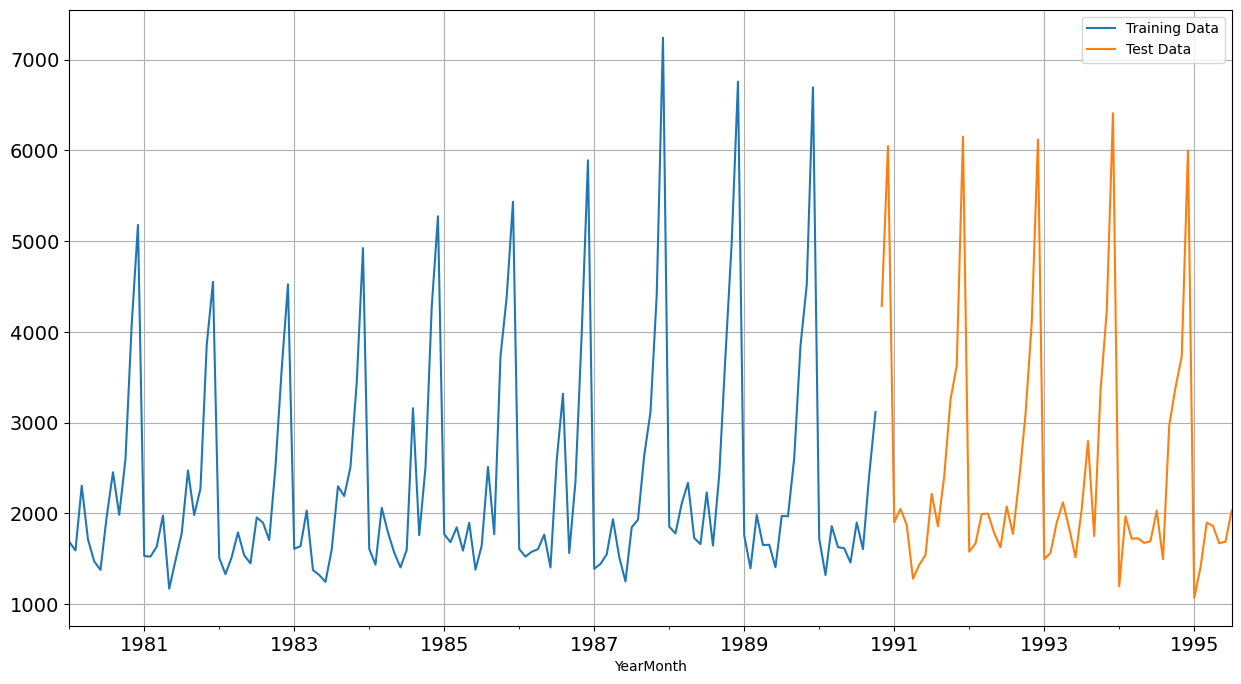

In [36]:
train['Sparkling'].plot(fontsize=14)
test['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [37]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+131 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance 
 [131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [38]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [39]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Sparkling,time
YearMonth,,
1980-01-01,1686,1
1980-02-01,1591,2
1980-03-01,2304,3
1980-04-01,1712,4
1980-05-01,1471,5


Last few rows of Training Data


,Sparkling,time
YearMonth,,
1990-06-01,1457,126
1990-07-01,1899,127
1990-08-01,1605,128
1990-09-01,2424,129
1990-10-01,3116,130


First few rows of Test Data


,Sparkling,time
YearMonth,,
1990-11-01,4286,131
1990-12-01,6047,132
1991-01-01,1902,133
1991-02-01,2049,134
1991-03-01,1874,135


Last few rows of Test Data


,Sparkling,time
YearMonth,,
1995-03-01,1897,183
1995-04-01,1862,184
1995-05-01,1670,185
1995-06-01,1688,186
1995-07-01,2031,187


In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression()

In [43]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

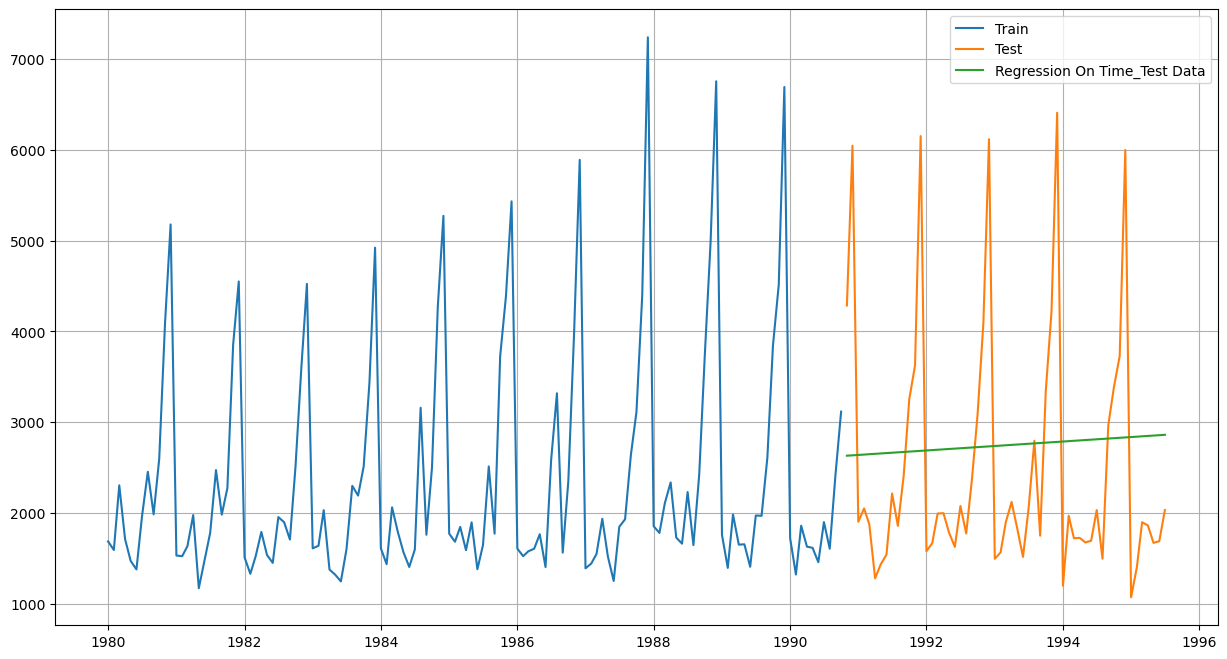

In [44]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [45]:
from sklearn import metrics

In [46]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1392.438 


In [47]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1392.438305


In [48]:
#Naive Approach

In [49]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [50]:
train.tail()

,Sparkling
YearMonth,
1990-06-01,1457
1990-07-01,1899
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116


In [51]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1990-11-01    3116
1990-12-01    3116
1991-01-01    3116
1991-02-01    3116
1991-03-01    3116
Name: naive, dtype: int64

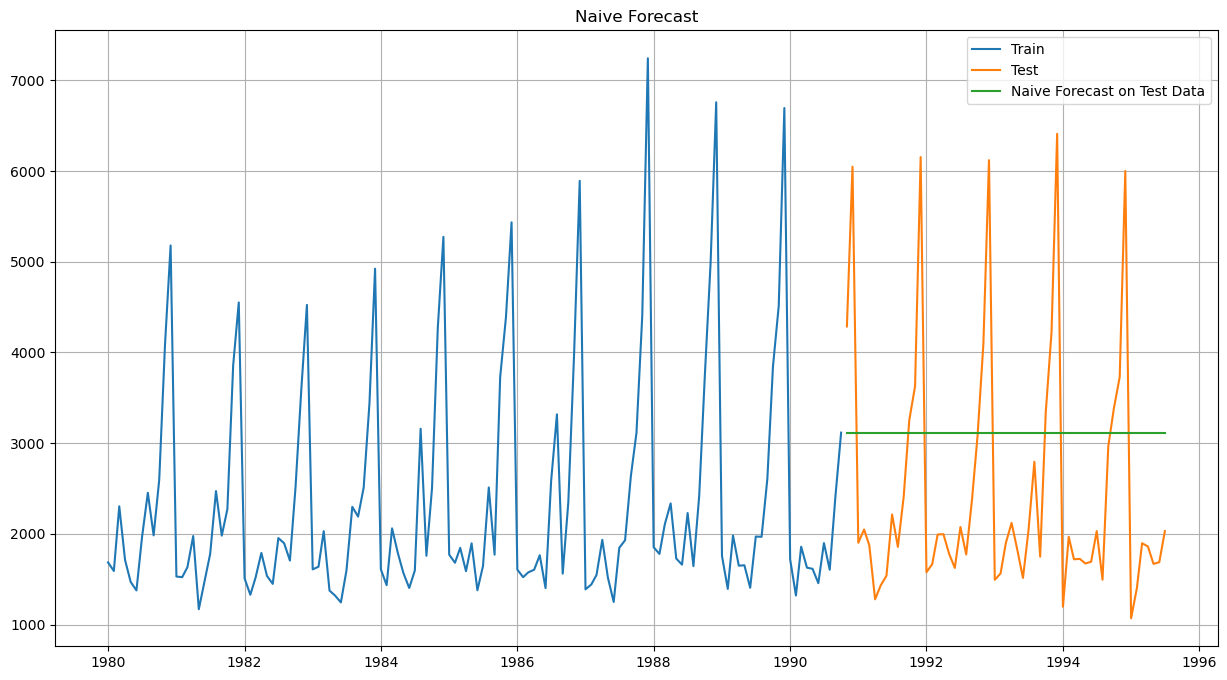

In [52]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [53]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1496.445


In [54]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1392.438305
NaiveModel,1496.444629


In [55]:
# Simple Average

In [56]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [57]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
YearMonth,,
1990-11-01,4286,2361.276923
1990-12-01,6047,2361.276923
1991-01-01,1902,2361.276923
1991-02-01,2049,2361.276923
1991-03-01,1874,2361.276923


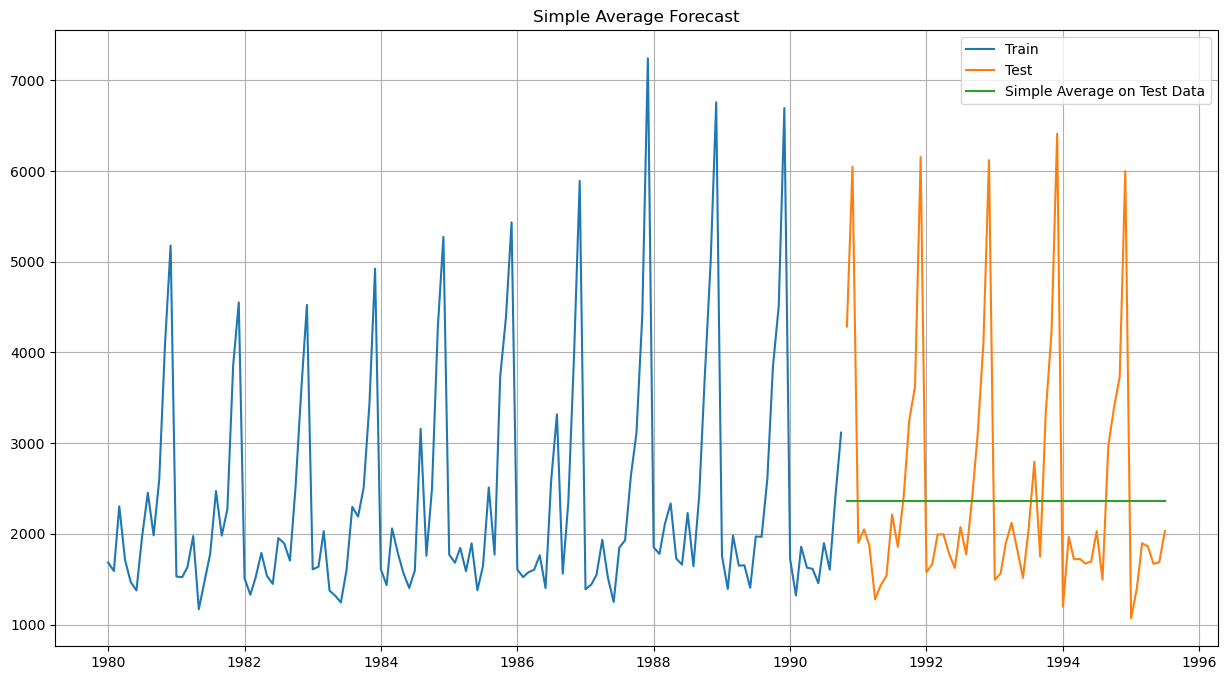

In [58]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [59]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1368.747


In [60]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1392.438305
NaiveModel,1496.444629
SimpleAverageModel,1368.746717


In [61]:
#Moving Average

In [63]:
MovingAverage = df_s.copy()
MovingAverage.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [64]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


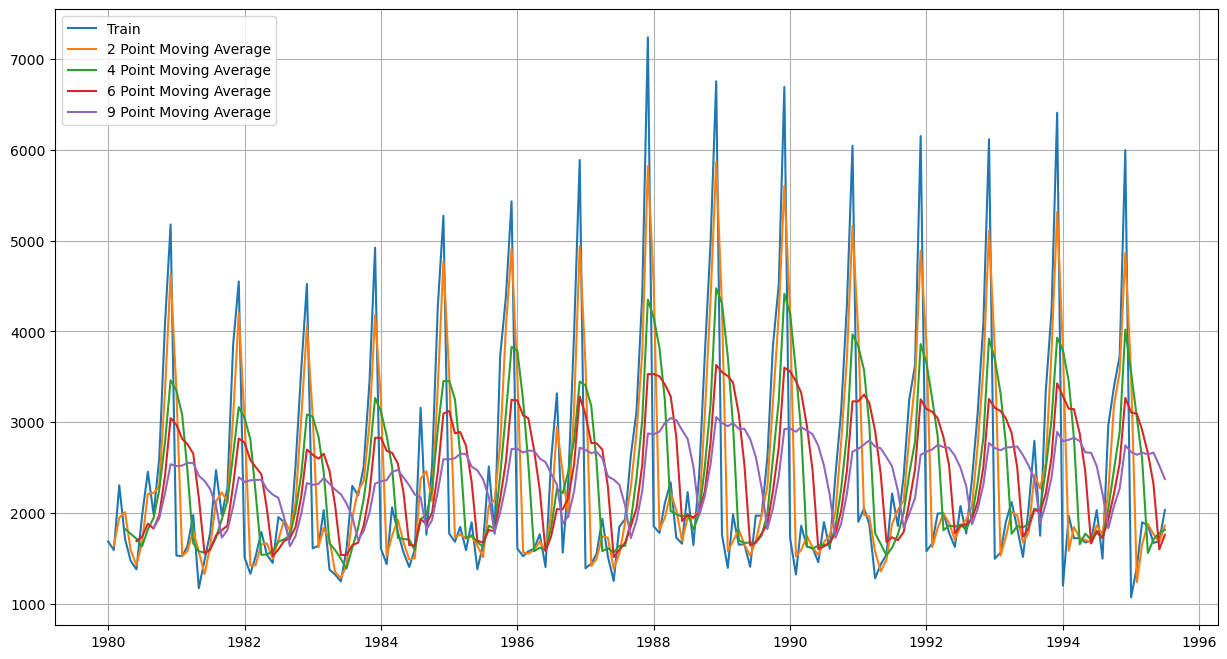

In [65]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [66]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

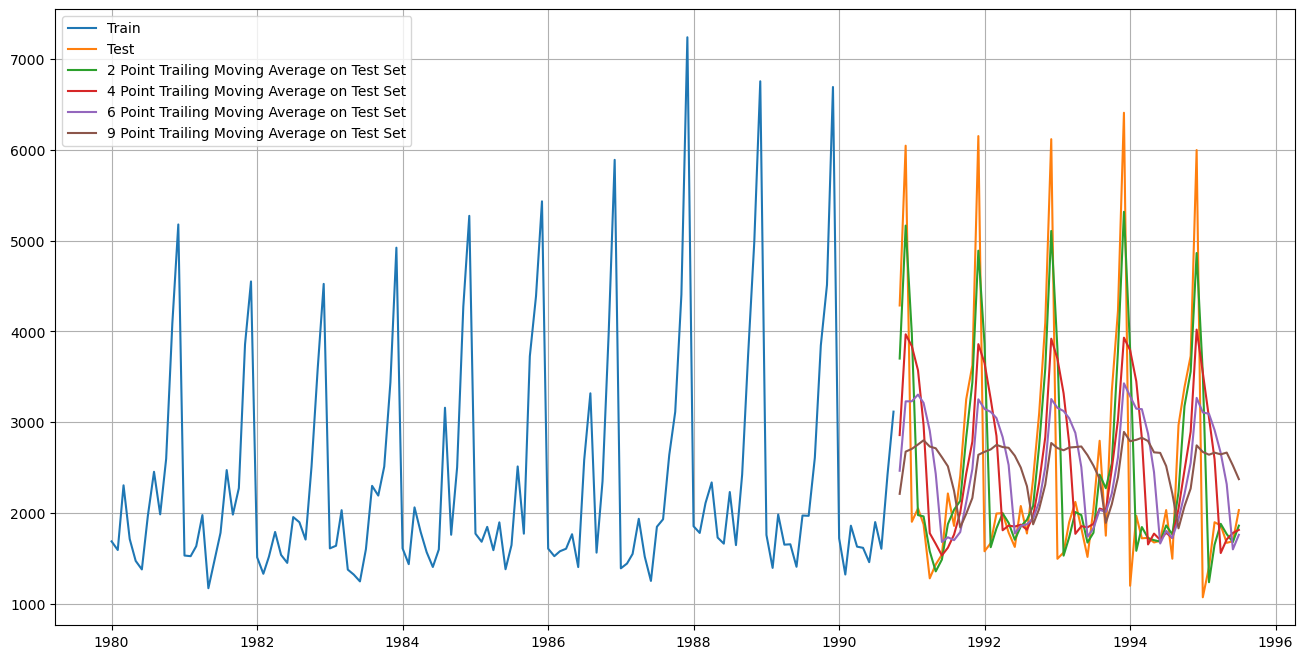

In [67]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [69]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 811.179
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1184.213
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1337.201
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1422.653


In [70]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,1392.438305
NaiveModel,1496.444629
SimpleAverageModel,1368.746717
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281


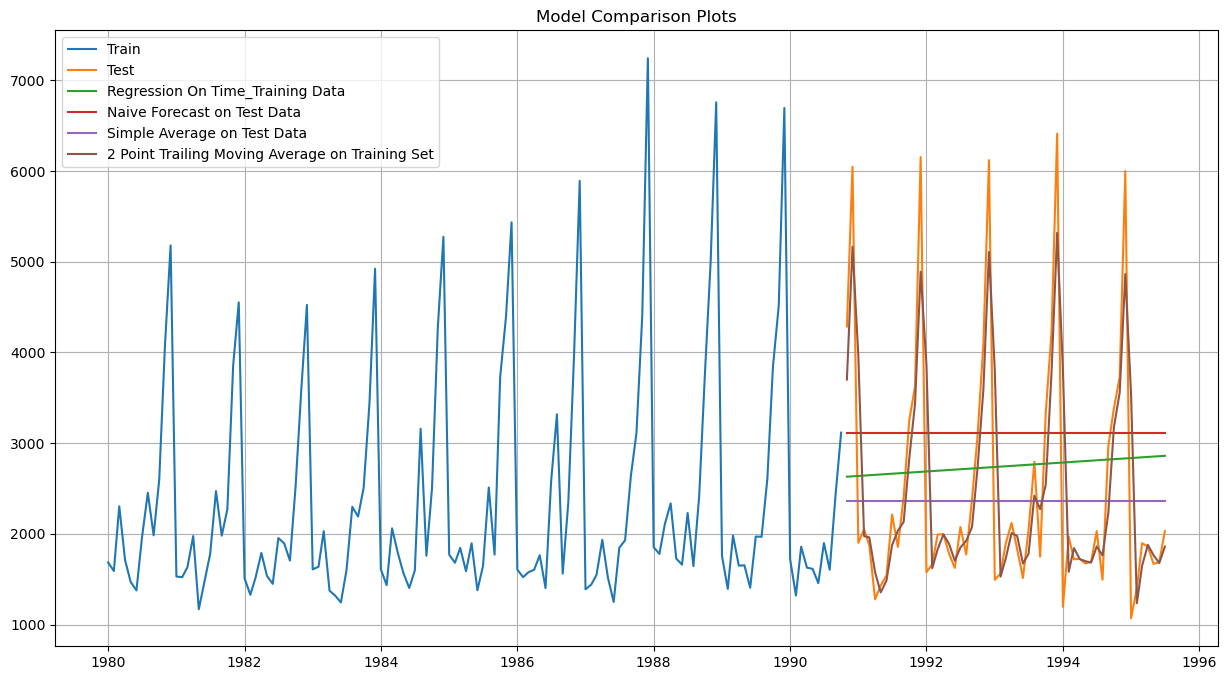

In [71]:
## Plotting on both Training and Test data

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [72]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

In [73]:
#SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors

In [74]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [75]:
model_SES_autofit = model_SES.fit(optimized=True)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [76]:
model_SES_autofit.params

{'smoothing_level': 0.06993710867703143,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1758.9176856990248,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [77]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1990-11-01    2429.64414
1990-12-01    2429.64414
1991-01-01    2429.64414
1991-02-01    2429.64414
1991-03-01    2429.64414
1991-04-01    2429.64414
1991-05-01    2429.64414
1991-06-01    2429.64414
1991-07-01    2429.64414
1991-08-01    2429.64414
1991-09-01    2429.64414
1991-10-01    2429.64414
1991-11-01    2429.64414
1991-12-01    2429.64414
1992-01-01    2429.64414
1992-02-01    2429.64414
1992-03-01    2429.64414
1992-04-01    2429.64414
1992-05-01    2429.64414
1992-06-01    2429.64414
1992-07-01    2429.64414
1992-08-01    2429.64414
1992-09-01    2429.64414
1992-10-01    2429.64414
1992-11-01    2429.64414
1992-12-01    2429.64414
1993-01-01    2429.64414
1993-02-01    2429.64414
1993-03-01    2429.64414
1993-04-01    2429.64414
1993-05-01    2429.64414
1993-06-01    2429.64414
1993-07-01    2429.64414
1993-08-01    2429.64414
1993-09-01    2429.64414
1993-10-01    2429.64414
1993-11-01    2429.64414
1993-12-01    2429.64414
1994-01-01    2429.64414
1994-02-01    2429.64414


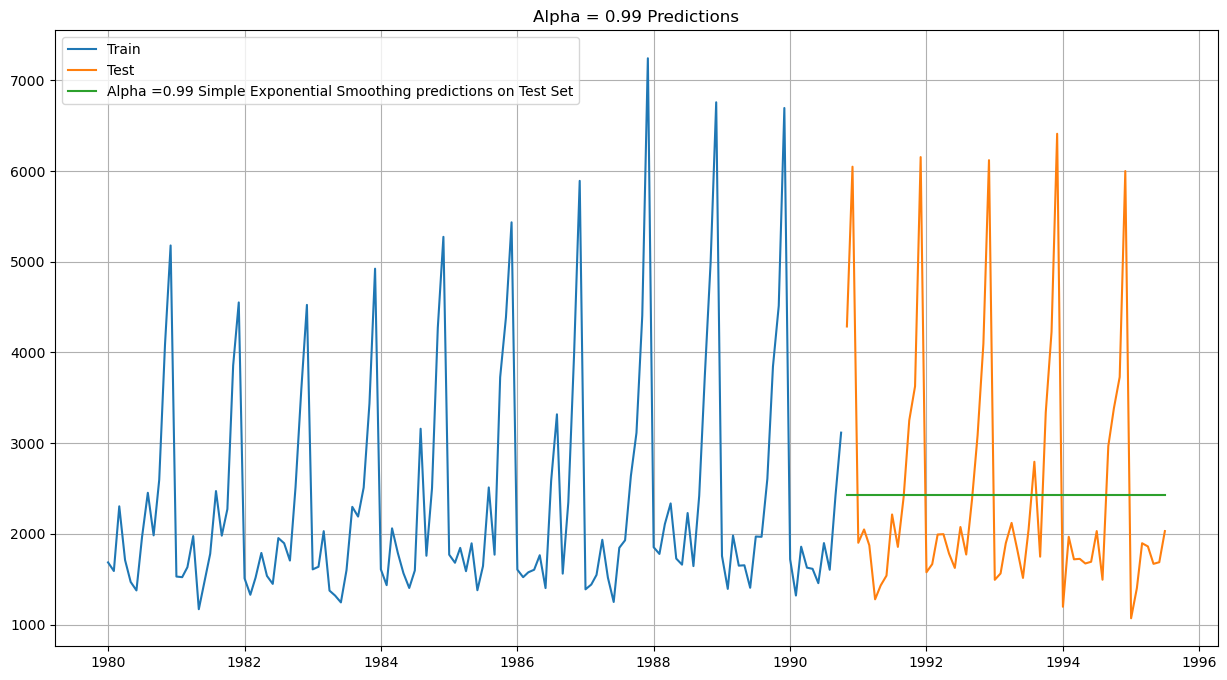

In [78]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [79]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [80]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))

SES RMSE: 1363.703334225808


In [81]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1363.703334


In [82]:
#Double Exponential Smoothing

In [83]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07568138427743348, 'smoothing_trend': 0.07564849713133869, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1505.5981603919731, 'initial_trend': 6.848682802199605, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [84]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1990-11-01    2409.794442
1990-12-01    2393.482652
1991-01-01    2377.170862
1991-02-01    2360.859072
1991-03-01    2344.547282
1991-04-01    2328.235492
1991-05-01    2311.923702
1991-06-01    2295.611912
1991-07-01    2279.300121
1991-08-01    2262.988331
1991-09-01    2246.676541
1991-10-01    2230.364751
1991-11-01    2214.052961
1991-12-01    2197.741171
1992-01-01    2181.429381
1992-02-01    2165.117591
1992-03-01    2148.805801
1992-04-01    2132.494011
1992-05-01    2116.182221
1992-06-01    2099.870431
1992-07-01    2083.558641
1992-08-01    2067.246851
1992-09-01    2050.935061
1992-10-01    2034.623270
1992-11-01    2018.311480
1992-12-01    2001.999690
1993-01-01    1985.687900
1993-02-01    1969.376110
1993-03-01    1953.064320
1993-04-01    1936.752530
1993-05-01    1920.440740
1993-06-01    1904.128950
1993-07-01    1887.817160
1993-08-01    1871.505370
1993-09-01    1855.193580
1993-10-01    1838.881790
1993-11-01    1822.570000
1993-12-01    1806.258210
1994-01-01  

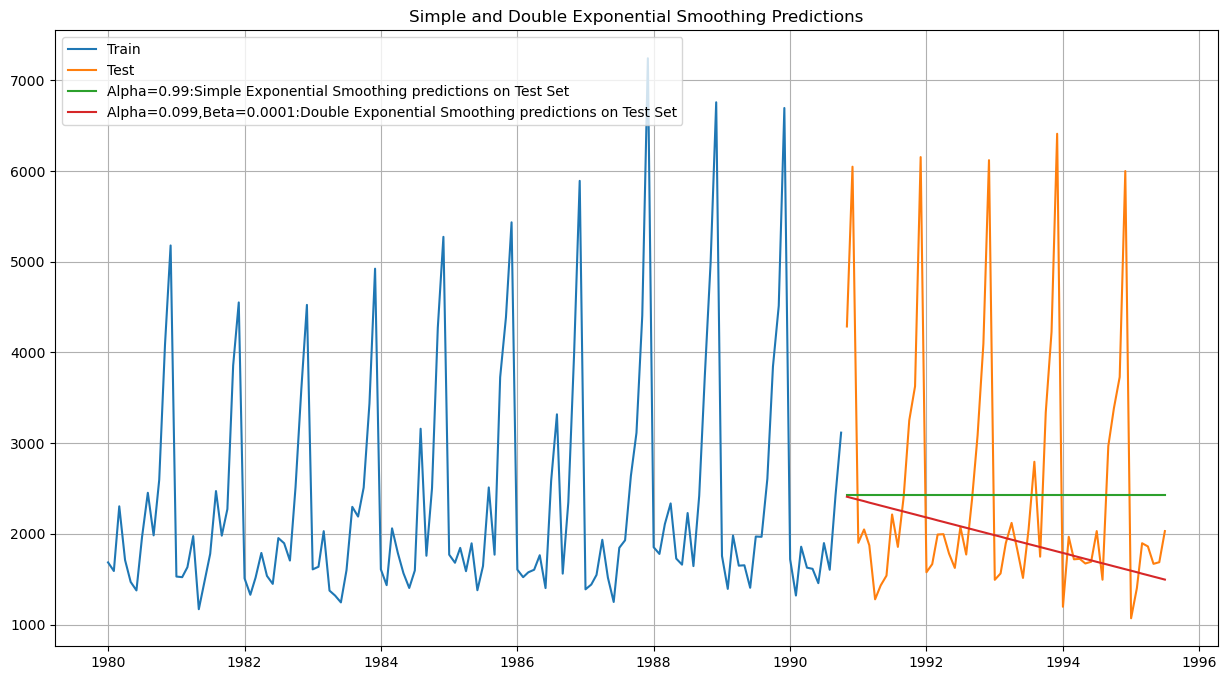

In [85]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [86]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07598944334560086, 'smoothing_trend': 0.03257983107648835, 'smoothing_seasonal': 0.47924862401964097, 'damping_trend': nan, 'initial_level': 2356.5262910513907, 'initial_trend': -0.7868042592276397, 'initial_seasons': array([-636.24270225, -722.99141342, -398.63320667, -473.44414522,
       -808.44189536, -815.36463524, -384.23734682,   72.99624204,
       -237.45744559,  272.31932254, 1541.3947672 , 2590.08848375]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [87]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1990-11-01    4496.726706
1990-12-01    6549.583673
1991-01-01    1619.356203
1991-02-01    1324.185691
1991-03-01    1806.043670
1991-04-01    1660.225412
1991-05-01    1567.082026
1991-06-01    1382.695259
1991-07-01    1903.976823
1991-08-01    1761.268695
1991-09-01    2403.035941
1991-10-01    3534.581545
1991-11-01    4489.976251
1991-12-01    6542.833219
1992-01-01    1612.605748
1992-02-01    1317.435236
1992-03-01    1799.293215
1992-04-01    1653.474958
1992-05-01    1560.331571
1992-06-01    1375.944804
1992-07-01    1897.226368
1992-08-01    1754.518240
1992-09-01    2396.285486
1992-10-01    3527.831091
1992-11-01    4483.225796
1992-12-01    6536.082764
1993-01-01    1605.855293
1993-02-01    1310.684782
1993-03-01    1792.542760
1993-04-01    1646.724503
1993-05-01    1553.581116
1993-06-01    1369.194349
1993-07-01    1890.475913
1993-08-01    1747.767785
1993-09-01    2389.535031
1993-10-01    3521.080636
1993-11-01    4476.475341
1993-12-01    6529.332309
1994-01-01  

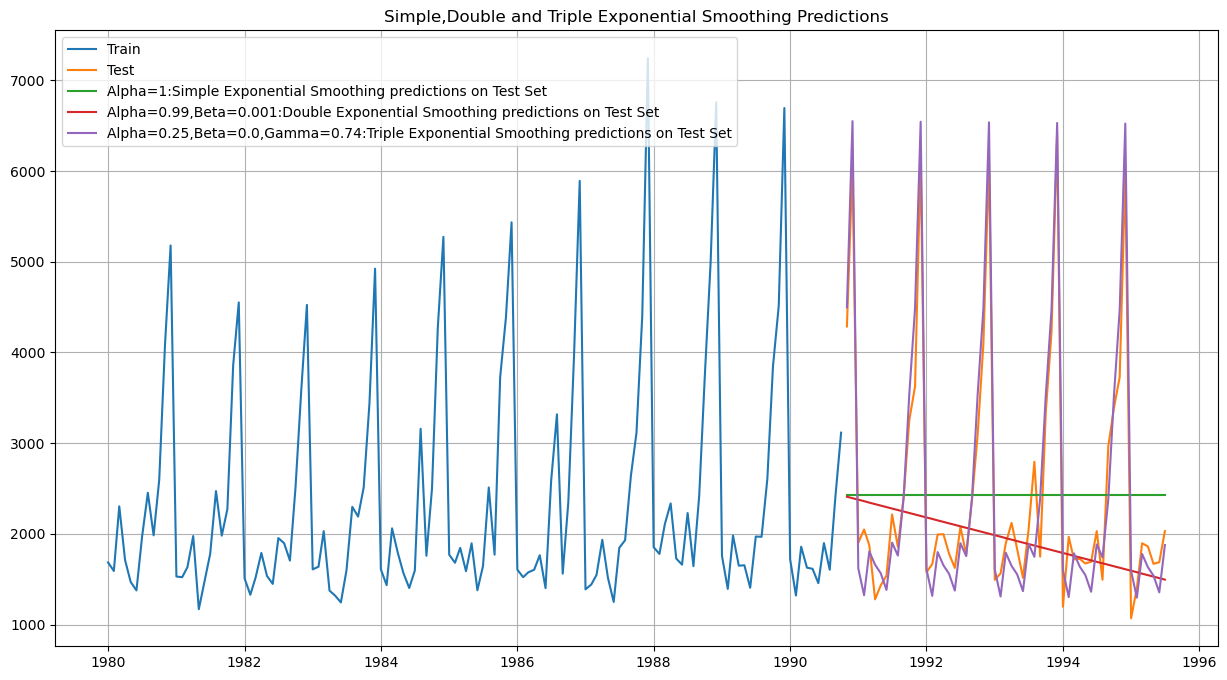

In [88]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [89]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 366.94744261051363


In [90]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1363.703334
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",366.947443


In [100]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
df_s1=pd.read_csv('Sparkling.csv')

In [102]:
df_s1.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [103]:
dates = pd.date_range(start='1980-01-01', freq='MS', periods=len(df_s1))

In [104]:
import calendar
df_s1['Month'] = dates.month
df_s1['Month'] = df_s1['Month'].apply(lambda x: calendar.month_abbr[x]) #spltting into english month names 
df_s1['Year'] = dates.year

In [105]:
df_s1.drop(['YearMonth'], axis=1, inplace=True)
df_s1.rename(columns={'Number_Sparkling_Sold':'Sparkling'}, inplace=True)
df_s1 = df_s1[['Month', 'Year', 'Sparkling']]

In [107]:
df_s1.set_index(dates, inplace=True)

In [108]:
df_s1.head()

,Month,Year,Sparkling
1980-01-01,Jan,1980,1686
1980-02-01,Feb,1980,1591
1980-03-01,Mar,1980,2304
1980-04-01,Apr,1980,1712
1980-05-01,May,1980,1471


In [109]:
# extract out the time-series
sales_ts = df_s1['Sparkling']

Text(0, 0.5, 'Sparkling')

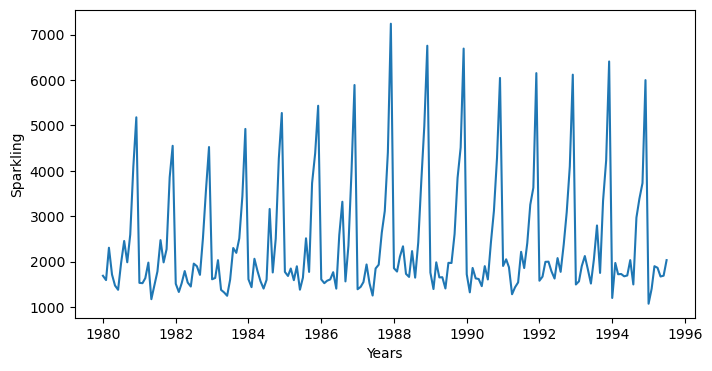

In [110]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Sparkling')

In [111]:
from statsmodels.tsa.stattools import adfuller

In [112]:
#python implementation of dicky fuller test 
dftest = adfuller(sales_ts)
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.360
DF test p-value is 0.6011


In [113]:
monthly_sales_data = pd.pivot_table(df_s1, values = "Sparkling", columns = "Year", index = "Month")
monthly_sales_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
Apr,1712.0,1976.0,1790.0,1375.0,1789.0,1589.0,1605.0,1935.0,2336.0,1650.0,1628.0,1279.0,1997.0,2121.0,1725.0,1862.0
Aug,2453.0,2472.0,1897.0,2298.0,3159.0,2512.0,3318.0,1930.0,1645.0,1968.0,1605.0,1857.0,1773.0,2795.0,1495.0,NaN
Dec,5179.0,4551.0,4524.0,4923.0,5274.0,5434.0,5891.0,7242.0,6757.0,6694.0,6047.0,6153.0,6119.0,6410.0,5999.0,NaN
Feb,1591.0,1523.0,1329.0,1638.0,1435.0,1682.0,1523.0,1442.0,1779.0,1394.0,1321.0,2049.0,1667.0,1564.0,1968.0,1402.0
Jan,1686.0,1530.0,1510.0,1609.0,1609.0,1771.0,1606.0,1389.0,1853.0,1757.0,1720.0,1902.0,1577.0,1494.0,1197.0,1070.0
Jul,1966.0,1781.0,1954.0,1600.0,1597.0,1645.0,2584.0,1847.0,2230.0,1971.0,1899.0,2214.0,2076.0,2048.0,2031.0,2031.0
Jun,1377.0,1480.0,1449.0,1245.0,1404.0,1379.0,1403.0,1250.0,1661.0,1406.0,1457.0,1540.0,1625.0,1515.0,1693.0,1688.0
Mar,2304.0,1633.0,1518.0,2030.0,2061.0,1846.0,1577.0,1548.0,2108.0,1982.0,1859.0,1874.0,1993.0,1898.0,1720.0,1897.0
May,1471.0,1170.0,1537.0,1320.0,1567.0,1896.0,1765.0,1518.0,1728.0,1654.0,1615.0,1432.0,1783.0,1831.0,1674.0,1670.0


In [114]:
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
Jan,1686.0,1530.0,1510.0,1609.0,1609.0,1771.0,1606.0,1389.0,1853.0,1757.0,1720.0,1902.0,1577.0,1494.0,1197.0,1070.0
Feb,1591.0,1523.0,1329.0,1638.0,1435.0,1682.0,1523.0,1442.0,1779.0,1394.0,1321.0,2049.0,1667.0,1564.0,1968.0,1402.0
Mar,2304.0,1633.0,1518.0,2030.0,2061.0,1846.0,1577.0,1548.0,2108.0,1982.0,1859.0,1874.0,1993.0,1898.0,1720.0,1897.0
Apr,1712.0,1976.0,1790.0,1375.0,1789.0,1589.0,1605.0,1935.0,2336.0,1650.0,1628.0,1279.0,1997.0,2121.0,1725.0,1862.0
May,1471.0,1170.0,1537.0,1320.0,1567.0,1896.0,1765.0,1518.0,1728.0,1654.0,1615.0,1432.0,1783.0,1831.0,1674.0,1670.0
Jun,1377.0,1480.0,1449.0,1245.0,1404.0,1379.0,1403.0,1250.0,1661.0,1406.0,1457.0,1540.0,1625.0,1515.0,1693.0,1688.0
Jul,1966.0,1781.0,1954.0,1600.0,1597.0,1645.0,2584.0,1847.0,2230.0,1971.0,1899.0,2214.0,2076.0,2048.0,2031.0,2031.0
Aug,2453.0,2472.0,1897.0,2298.0,3159.0,2512.0,3318.0,1930.0,1645.0,1968.0,1605.0,1857.0,1773.0,2795.0,1495.0,NaN
Sep,1984.0,1981.0,1706.0,2191.0,1759.0,1771.0,1562.0,2638.0,2421.0,2608.0,2424.0,2408.0,2377.0,1749.0,2968.0,NaN


<Axes: xlabel='Month'>

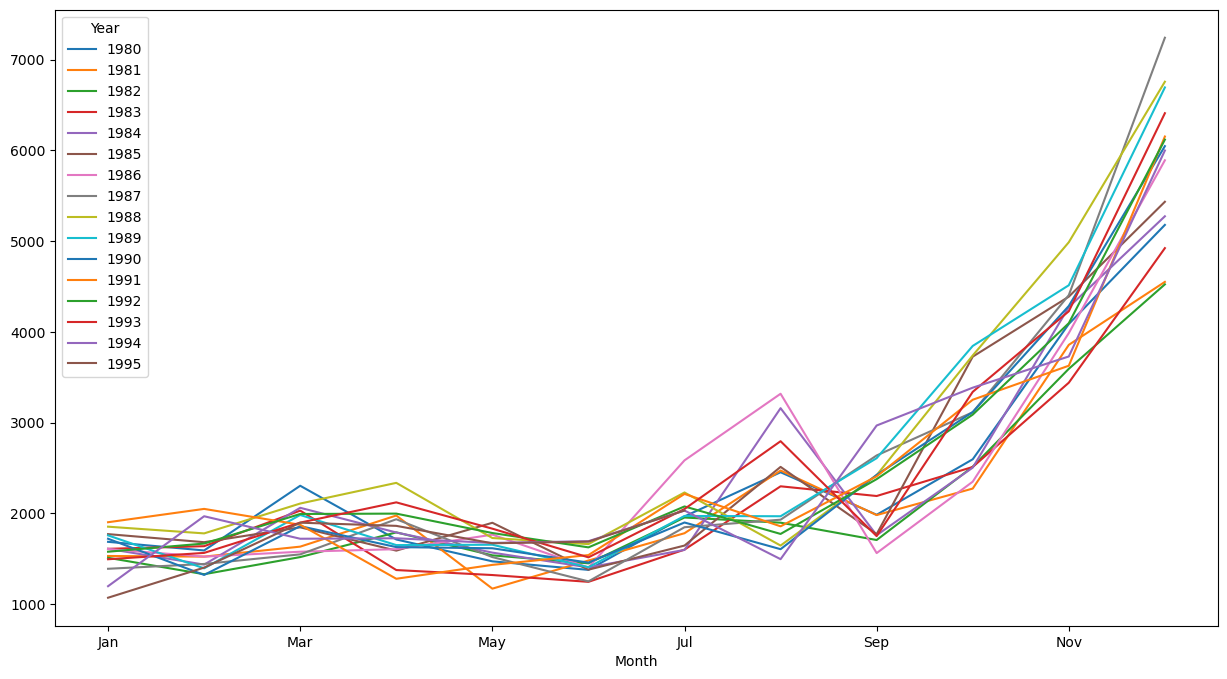

In [115]:
monthly_sales_data.plot()

In [117]:
yearly_sales_data = pd.pivot_table(df_s1, values = "Sparkling", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


<Axes: xlabel='Year'>

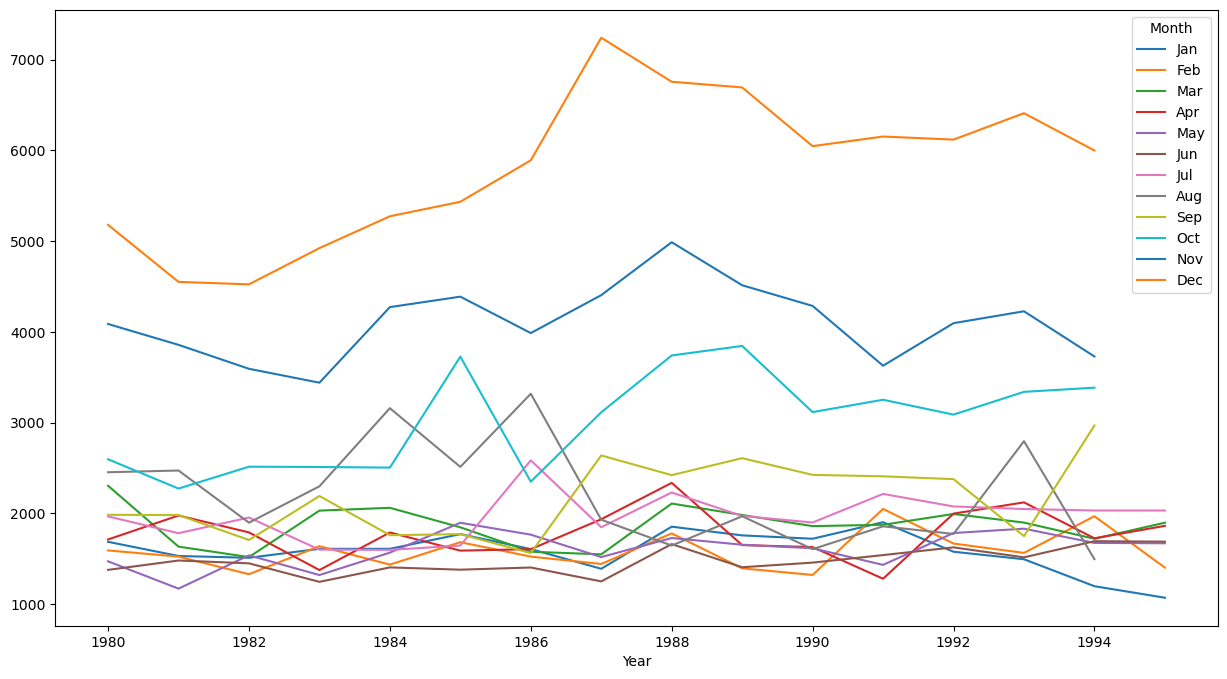

In [118]:
yearly_sales_data.plot()

<Axes: >

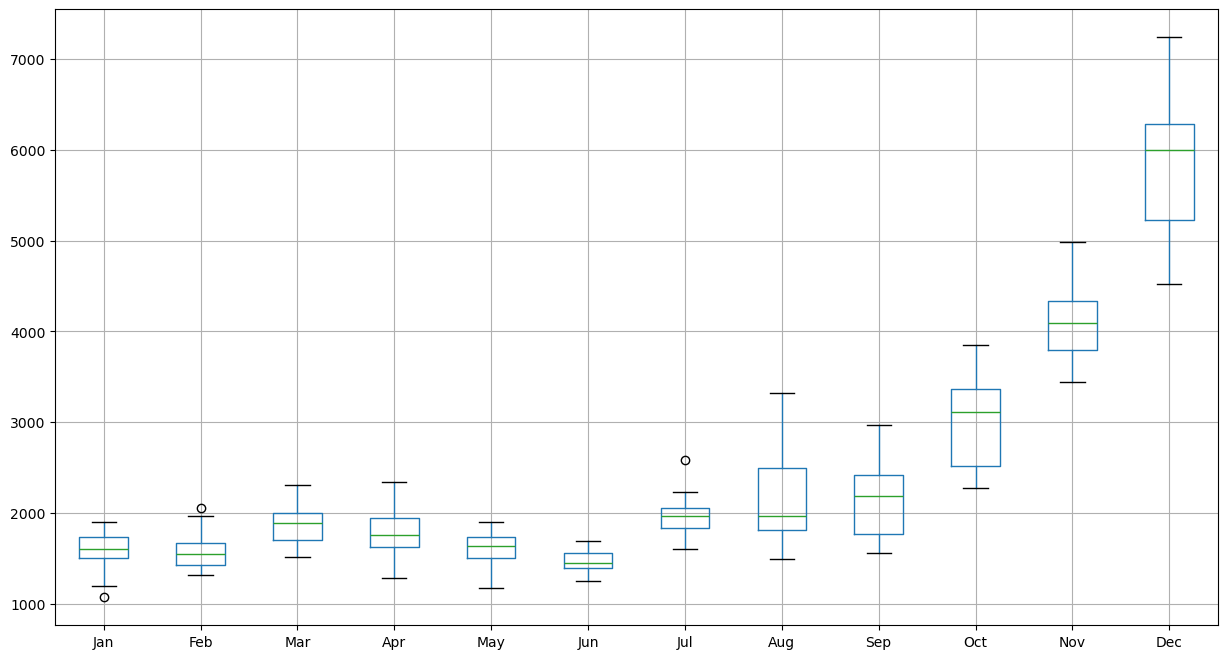

In [119]:
yearly_sales_data.boxplot()

In [120]:
decomposition = sm.tsa.seasonal_decompose(sales_ts, model='multiplicative')

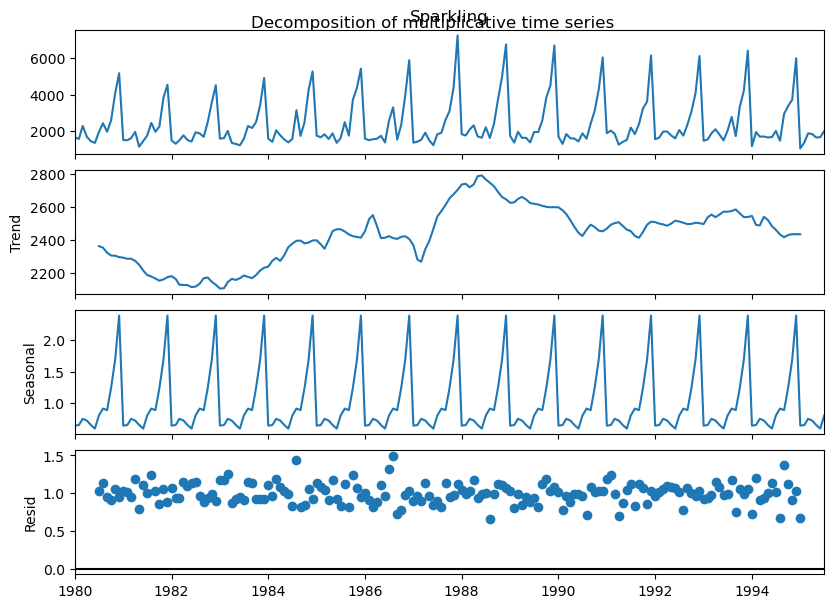

In [121]:
fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

Text(0, 0.5, 'Sparkling')

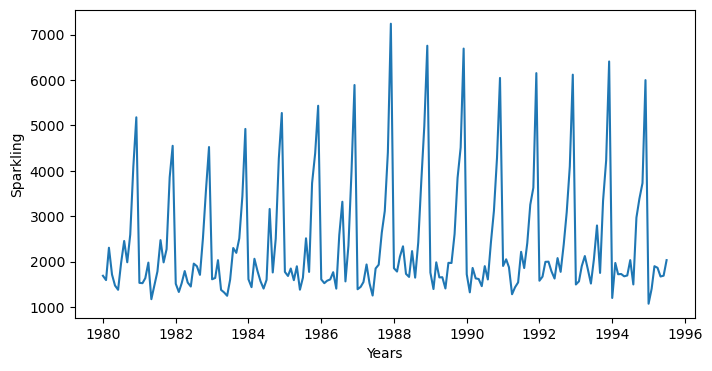

In [124]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Sparkling')

Text(0, 0.5, 'Sparkling')

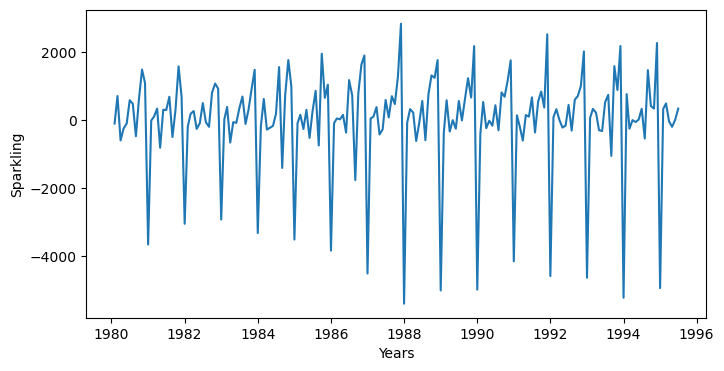

In [125]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Sparkling')

Text(0, 0.5, 'Log (Sparkling)')

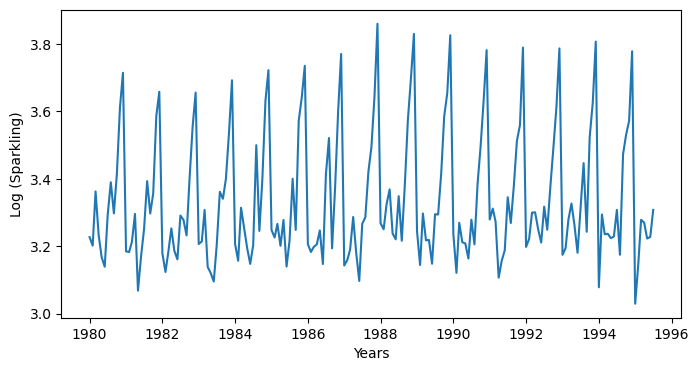

In [126]:
plt.figure(figsize=(8, 4))
plt.plot(np.log10(sales_ts))
plt.xlabel('Years')
plt.ylabel('Log (Sparkling)')

Text(0, 0.5, 'Differenced Log (Sparkling)')

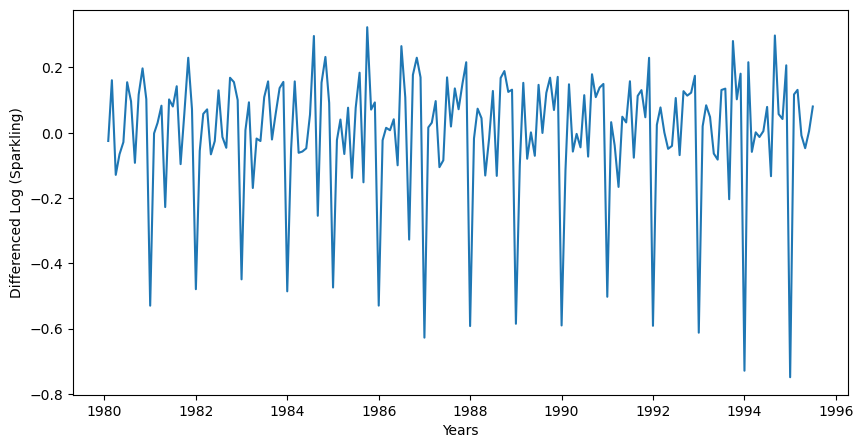

In [127]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Sparkling)')

In [128]:
# Define the p parameter to take any value between 0 and 2
p= range(1,4)

In [129]:
# Define the q parameter to take any value between 0 and 2
q = range(1, 4)

In [130]:

d= range(0,2)

#Generate all different combinations of p with d=0 and q=0 triplets for AR model building
pdq_ar = list(itertools.product(p, range(1), range(1)))

#Generate all different combinations of p,q with d=0 triplets for ARMA model building
pdq_arma = list(itertools.product(p, range(1),q))

#Generate all different combinations of p, d and q triplets for ARIMA model building 
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [131]:
pdq_ar

[(1, 0, 0), (2, 0, 0), (3, 0, 0)]

In [132]:
pdq_arma

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3)]

In [133]:
pdq

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [134]:
seasonal_pdq

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

In [135]:
#Separate data into train and test
df_s1['date'] = df_s1.index
train = df_s1[df_s1.index < '2013-01-01']
test = df_s1[df_s1.index >= '2013-01-01']


In [138]:
dftest = adfuller(train['Sparkling'])#Stationarity check on train time series data 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.360
DF test p-value is 0.6011


In [140]:
train_sales_ts_log = np.log10(train['Sparkling'])
#Log transformation on the training data to make the time series stationary as we did with full data 

In [141]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [142]:
# Creating an empty Dataframe with column names only
AR_AIC = pd.DataFrame(columns=['param', 'AIC'])
AR_AIC

,param,AIC


In [144]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_ar:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
   

ARIMA(1, 0, 0) - AIC:-126.31776667163365
ARIMA(2, 0, 0) - AIC:-129.00012937497576
ARIMA(3, 0, 0) - AIC:-127.8509287293239


In [145]:
best_model = ARIMA(train_sales_ts_log,order = (2,0,0))#p=2 with lowest AIC 
best_results = best_model.fit()

In [146]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  187
Model:                 ARIMA(2, 0, 0)   Log Likelihood                  68.500
Date:                Sun, 23 Jun 2024   AIC                           -129.000
Time:                        17:59:05   BIC                           -116.076
Sample:                    01-01-1980   HQIC                          -123.763
                         - 07-01-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3345      0.027    124.259      0.000       3.282       3.387
ar.L1          0.4775      0.098      4.849      0.000       0.284       0.671
ar.L2         -0.1568      0.124     -1.266      0.2

In [177]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1995-01-01'), dynamic=True, full_results=True)

In [163]:
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [165]:
# Compute the root mean square error
mse = ((testCopy1['Sparkling'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is nan


In [171]:
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

,param,AIC


In [173]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_arma:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    

ARIMA(1, 0, 1) - AIC:-127.76670270666497
ARIMA(1, 0, 2) - AIC:-126.86920077702914
ARIMA(1, 0, 3) - AIC:-138.64635237267325
ARIMA(2, 0, 1) - AIC:-146.75849258823797
ARIMA(2, 0, 2) - AIC:-126.74581621854043
ARIMA(2, 0, 3) - AIC:-197.35700627911035
ARIMA(3, 0, 1) - AIC:-146.19516837355673
ARIMA(3, 0, 2) - AIC:-145.53222566544696
ARIMA(3, 0, 3) - AIC:-196.96735123259737


In [175]:
best_model = ARIMA(train_sales_ts_log,order = (3,0,3))
best_results = best_model.fit()

In [176]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  187
Model:                 ARIMA(3, 0, 3)   Log Likelihood                 106.484
Date:                Sun, 23 Jun 2024   AIC                           -196.967
Time:                        18:13:57   BIC                           -171.118
Sample:                    01-01-1980   HQIC                          -186.493
                         - 07-01-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3390      0.008    413.747      0.000       3.323       3.355
ar.L1          0.7405      0.059     12.631      0.000       0.626       0.855
ar.L2          0.7196      0.103      6.973      0.0

In [180]:
best_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                      order=(1, 0, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36134D+00    |proj g|=  1.54822D+01

At iterate    5    f= -3.83218D-01    |proj g|=  1.62463D+00

At iterate   10    f= -8.01519D-01    |proj g|=  2.79981D-01

At iterate   15    f= -1.11012D+00    |proj g|=  1.17644D+00

At iterate   20    f= -1.13603D+00    |proj g|=  2.49460D-02

At iterate   25    f= -1.14917D+00    |proj g|=  3.42226D-01



 This problem is unconstrained.


At iterate   30    f= -1.17363D+00    |proj g|=  4.38253D-02

At iterate   35    f= -1.17366D+00    |proj g|=  1.71632D-02

At iterate   40    f= -1.17366D+00    |proj g|=  3.31915D-04

At iterate   45    f= -1.17367D+00    |proj g|=  9.78684D-03

At iterate   50    f= -1.17369D+00    |proj g|=  1.22157D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     76      1     0     0   1.222D-02  -1.174D+00
  F =  -1.1736940745918480     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [181]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 219.481
Date:                            Sun, 23 Jun 2024   AIC                           -428.962
Time:                                    18:23:19   BIC                           -412.806
Sample:                                01-01-1980   HQIC                          -422.415
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9989      0.002    616.734      0.000       0.996       1.002
ma.L1         -0.9476      0.032   

In [188]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

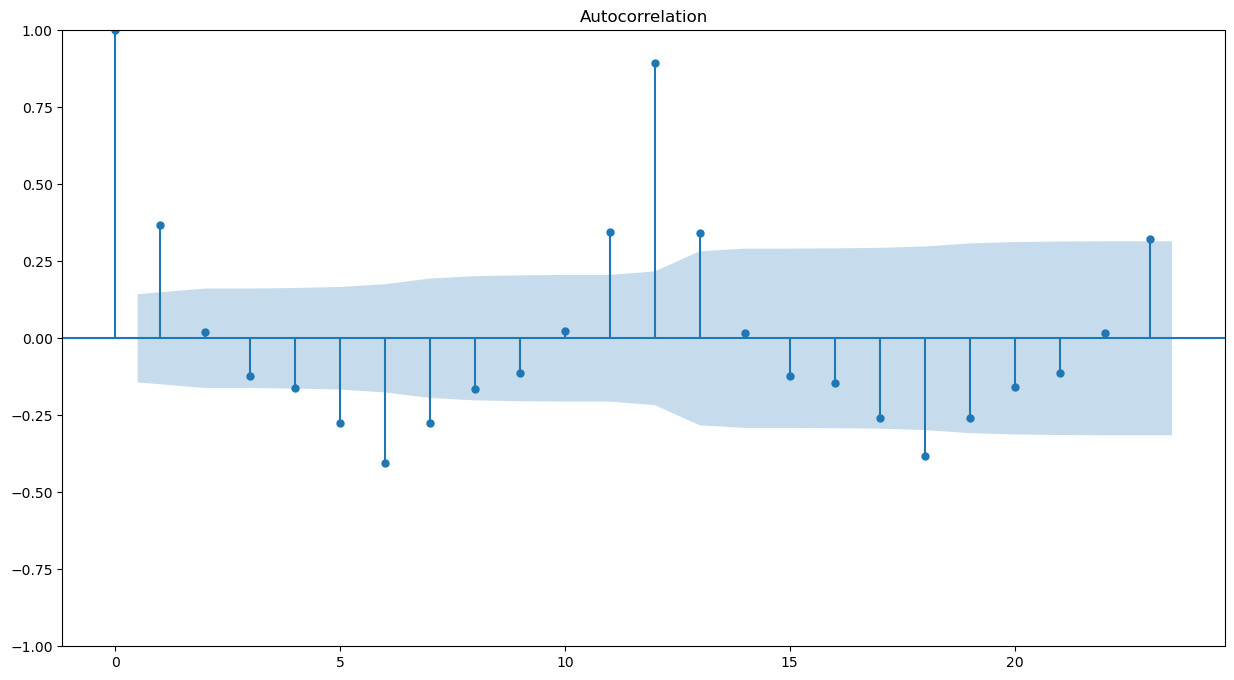

In [189]:
plot_acf(train['Sparkling'],alpha=0.05);

In [190]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [191]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [ ]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in seasonal_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.48432D-01    |proj g|=  3.81180D+00

At iterate    5    f= -1.05571D+00    |proj g|=  4.01470D+00

At iterate   10    f= -1.17276D+00    |proj g|=  1.68304D-01

At iterate   15    f= -1.17294D+00    |proj g|=  2.72219D-01

At iterate   20    f= -1.17379D+00    |proj g|=  1.48639D-02

At iterate   25    f= -1.17381D+00    |proj g|=  2.44477D-02

At iterate   30    f= -1.17413D+00    |proj g|=  3.01620D-01

At iterate   35    f= -1.17430D+00    |proj g|=  8.68393D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f= -8.45727D-01    |proj g|=  4.46944D-01

At iterate   10    f= -9.80222D-01    |proj g|=  3.77501D-01

At iterate   15    f= -9.80564D-01    |proj g|=  4.20292D-02

At iterate   20    f= -9.80945D-01    |proj g|=  4.69886D-01

At iterate   25    f= -9.81058D-01    |proj g|=  2.32910D-02

At iterate   30    f= -9.81074D-01    |proj g|=  5.69513D-02

At iterate   35    f= -9.81202D-01    |proj g|=  8.61421D-02

At iterate   40    f= -9.81227D-01    |proj g|=  1.40704D-02

At iterate   45    f= -9.81289D-01    |proj g|=  2.82357D-01

At iterate   50    f= -9.81501D-01    |proj g|=  8.02590D-03

At iterate   55    f= -9.81508D-01    |proj g|=  1.30954D-01

At iterate   60    f= -9.81564D-01    |proj g|=  1.13450D-01

At iterate   65    f= -9.82287D-01    |proj g|=  4.03807D-01

At iterate   70    f= -9.82756D-01    |proj g|=  8.60124D-02

At iterate   75    f= -9.82811D-01    |proj g|=  1.58719D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     79    117      1     0     0   8.236D-03  -9.828D-01
  F = -0.98281158680660263     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(1, 0, 3, 12) - AIC:-353.5715334656694
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05299D+00    |proj g|=  2.49206D+00

At iterate    5    f= -1.06688D+00    |proj g|=  2.98477D-01

At iterate   10    f= -1.06794D+00    |proj g|=  4.34242D-02

At iterate   1

 This problem is unconstrained.



At iterate   20    f= -1.06851D+00    |proj g|=  1.90715D-01

At iterate   25    f= -1.06892D+00    |proj g|=  4.49835D-03

At iterate   30    f= -1.06894D+00    |proj g|=  2.75019D-02

At iterate   35    f= -1.06995D+00    |proj g|=  1.09878D-01

At iterate   40    f= -1.07017D+00    |proj g|=  3.10153D-02

At iterate   45    f= -1.07018D+00    |proj g|=  4.56398D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     54      1     0     0   4.564D-05  -1.070D+00
  F =  -1.0701848660671791     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:-390.2491399091

 This problem is unconstrained.



At iterate    5    f= -9.87614D-01    |proj g|=  2.31565D-02

At iterate   10    f= -9.87902D-01    |proj g|=  1.82694D-02

At iterate   15    f= -9.87928D-01    |proj g|=  1.00689D-01

At iterate   20    f= -9.88197D-01    |proj g|=  7.14716D-02

At iterate   25    f= -9.88226D-01    |proj g|=  2.92412D-03

At iterate   30    f= -9.88544D-01    |proj g|=  3.70827D-01

At iterate   35    f= -9.88998D-01    |proj g|=  2.88084D-02

At iterate   40    f= -9.89049D-01    |proj g|=  2.40810D-03

At iterate   45    f= -9.89049D-01    |proj g|=  1.02104D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     58   

 This problem is unconstrained.



At iterate    5    f= -8.83688D-01    |proj g|=  5.23649D-01

At iterate   10    f= -8.98716D-01    |proj g|=  5.97943D-02

At iterate   15    f= -9.00447D-01    |proj g|=  4.35594D-02

At iterate   20    f= -9.01103D-01    |proj g|=  5.91876D-02

At iterate   25    f= -9.01275D-01    |proj g|=  5.14494D-02

At iterate   30    f= -9.02361D-01    |proj g|=  7.39329D-03

At iterate   35    f= -9.02362D-01    |proj g|=  1.75920D-04

At iterate   40    f= -9.02363D-01    |proj g|=  3.76042D-03

At iterate   45    f= -9.02372D-01    |proj g|=  1.66303D-02

At iterate   50    f= -9.02375D-01    |proj g|=  6.73477D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f= -1.07690D+00    |proj g|=  1.30797D-01

At iterate   15    f= -1.07695D+00    |proj g|=  1.32976D-01

At iterate   20    f= -1.07790D+00    |proj g|=  3.64965D-01

At iterate   25    f= -1.07798D+00    |proj g|=  1.06513D-01

At iterate   30    f= -1.07924D+00    |proj g|=  1.24047D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     51      1     0     0   3.194D-02  -1.079D+00
  F =  -1.0792782424223730     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(2, 0, 1, 12) - AIC:-391.65006266596754
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.



At iterate    5    f= -1.07919D+00    |proj g|=  1.53972D+00

At iterate   10    f= -1.08196D+00    |proj g|=  2.48924D-02

At iterate   15    f= -1.08204D+00    |proj g|=  1.98786D-01

At iterate   20    f= -1.08248D+00    |proj g|=  2.33686D-02

At iterate   25    f= -1.08249D+00    |proj g|=  1.36541D-01

At iterate   30    f= -1.08253D+00    |proj g|=  1.04233D-01

At iterate   35    f= -1.08254D+00    |proj g|=  6.54588D-03

At iterate   40    f= -1.08261D+00    |proj g|=  5.33739D-01

At iterate   45    f= -1.08320D+00    |proj g|=  3.07348D-01

At iterate   50    f= -1.08323D+00    |proj g|=  1.39486D-03

At iterate   55    f= -1.08323D+00    |proj g|=  1.84550D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -8.19363D-01    |proj g|=  3.72555D-01

At iterate   10    f= -9.70708D-01    |proj g|=  9.65602D+00

At iterate   15    f= -9.86526D-01    |proj g|=  5.98689D-02

At iterate   20    f= -9.87673D-01    |proj g|=  1.78129D+00

At iterate   25    f= -9.87952D-01    |proj g|=  2.59279D-01

At iterate   30    f= -9.88103D-01    |proj g|=  1.02749D-02

At iterate   35    f= -9.88107D-01    |proj g|=  4.76414D-02

At iterate   40    f= -9.88426D-01    |proj g|=  4.90630D-01

At iterate   45    f= -9.88574D-01    |proj g|=  6.12656D-02

At iterate   50    f= -9.88597D-01    |proj g|=  1.02538D-01

At iterate   55    f= -9.88662D-01    |proj g|=  1.04581D-01

At iterate   60    f= -9.90427D-01    |proj g|=  1.25763D-01

At iterate   65    f= -9.90685D-01    |proj g|=  1.00772D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate   10    f= -9.83278D-01    |proj g|=  7.76177D-03

At iterate   15    f= -9.83291D-01    |proj g|=  2.79747D-02

At iterate   20    f= -9.83375D-01    |proj g|=  2.29634D-02

At iterate   25    f= -9.83974D-01    |proj g|=  7.88768D-02

At iterate   30    f= -9.84139D-01    |proj g|=  5.80848D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     38      1     0     0   5.808D-05  -9.841D-01
  F = -0.98413888567793018     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(2, 1, 1, 12) - AIC:-356.06794324354587
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.



At iterate    5    f= -9.77491D-01    |proj g|=  1.38749D-01

At iterate   10    f= -9.79342D-01    |proj g|=  1.64555D-01

At iterate   15    f= -9.80026D-01    |proj g|=  2.16892D-01

At iterate   20    f= -9.81183D-01    |proj g|=  3.81205D-02

At iterate   25    f= -9.81521D-01    |proj g|=  2.47179D-01

At iterate   30    f= -9.82228D-01    |proj g|=  2.68929D-02

At iterate   35    f= -9.82241D-01    |proj g|=  6.90175D-03

At iterate   40    f= -9.82242D-01    |proj g|=  1.85675D-03

At iterate   45    f= -9.82273D-01    |proj g|=  5.65856D-02

At iterate   50    f= -9.82388D-01    |proj g|=  7.89471D-03

At iterate   55    f= -9.82547D-01    |proj g|=  3.68864D-03

At iterate   60    f= -9.82549D-01    |proj g|=  2.56094D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f= -9.00402D-01    |proj g|=  8.43031D-01

At iterate   10    f= -9.03610D-01    |proj g|=  1.49875D-01

At iterate   15    f= -9.05637D-01    |proj g|=  9.29440D-03

At iterate   20    f= -9.05686D-01    |proj g|=  3.35533D-02

At iterate   25    f= -9.05704D-01    |proj g|=  9.99909D-03

At iterate   30    f= -9.05782D-01    |proj g|=  4.48121D-02

At iterate   35    f= -9.05794D-01    |proj g|=  1.76505D-03

At iterate   40    f= -9.05887D-01    |proj g|=  2.01264D-02

At iterate   45    f= -9.05987D-01    |proj g|=  2.06915D-03

At iterate   50    f= -9.05990D-01    |proj g|=  2.76505D-03

At iterate   55    f= -9.05994D-01    |proj g|=  1.19198D-03

At iterate   60    f= -9.05997D-01    |proj g|=  2.60956D-03

At iterate   65    f= -9.06097D-01    |proj g|=  2.34522D-02

At iterate   70    f= -9.06158D-01    |proj g|=  4.31835D-03

At iterate   75    f= -9.06162D-01    |proj g|=  1.63117D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate    5    f= -8.64568D-01    |proj g|=  1.25490D+00

At iterate   10    f= -9.69237D-01    |proj g|=  1.83548D+00

At iterate   15    f= -9.79909D-01    |proj g|=  4.56389D-02

At iterate   20    f= -9.81105D-01    |proj g|=  2.15518D-01

At iterate   25    f= -9.83000D-01    |proj g|=  4.77734D-02

At iterate   30    f= -9.83460D-01    |proj g|=  2.39099D-01

At iterate   35    f= -9.87382D-01    |proj g|=  4.85955D-01

At iterate   40    f= -9.87955D-01    |proj g|=  5.07764D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     64      1     0     0   1.271D-02  -9.880D-01
  F = -0.987956229903

 This problem is unconstrained.



At iterate    5    f= -9.31507D-01    |proj g|=  9.77133D-01

At iterate   10    f= -9.93950D-01    |proj g|=  4.97689D-01

At iterate   15    f= -9.94183D-01    |proj g|=  6.95832D-02

At iterate   20    f= -9.94382D-01    |proj g|=  1.85023D-01

At iterate   25    f= -9.94387D-01    |proj g|=  7.99921D-03

At iterate   30    f= -9.94578D-01    |proj g|=  2.04872D-01

At iterate   35    f= -9.94642D-01    |proj g|=  1.29429D-02

At iterate   40    f= -9.94687D-01    |proj g|=  1.03613D-01

At iterate   45    f= -9.94727D-01    |proj g|=  6.42955D-03

At iterate   50    f= -9.94729D-01    |proj g|=  7.18890D-03

At iterate   55    f= -9.94737D-01    |proj g|=  7.18071D-02

At iterate   60    f= -9.94801D-01    |proj g|=  2.09490D-01

At iterate   65    f= -9.94896D-01    |proj g|=  5.52538D-02

At iterate   70    f= -9.94998D-01    |proj g|=  1.28995D-02

At iterate   75    f= -9.95027D-01    |proj g|=  1.40222D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     79    147      2     0     0   2.132D-02  -9.950D-01
  F = -0.99502912161756563     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 0, 1)x(3, 0, 2, 12) - AIC:-356.14089148496953
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.54004D-01    |proj g|=  3.26995D+00



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f= -8.79493D-01    |proj g|=  1.95362D+00

At iterate   10    f= -9.90732D-01    |proj g|=  1.29977D+00

At iterate   15    f= -9.91877D-01    |proj g|=  3.06248D-01

At iterate   20    f= -9.95752D-01    |proj g|=  8.64529D-02

At iterate   25    f= -9.96864D-01    |proj g|=  2.60897D-01

At iterate   30    f= -9.96992D-01    |proj g|=  2.08615D-01

At iterate   35    f= -9.98192D-01    |proj g|=  1.17396D+00

At iterate   40    f= -9.99599D-01    |proj g|=  1.84147D-01

At iterate   45    f= -9.99783D-01    |proj g|=  1.88952D-01

At iterate   50    f= -1.00044D+00    |proj g|=  3.52816D-01

At iterate   55    f= -1.00087D+00    |proj g|=  8.23568D-02

At iterate   60    f= -1.00095D+00    |proj g|=  2.46868D-02

At iterate   65    f= -1.00099D+00    |proj g|=  1.27695D-01

At iterate   70    f= -1.00124D+00    |proj g|=  3.88264D-02

At iterate   75    f= -1.00125D+00    |proj g|=  8.04140D-03

At iterate   80    f= -1.00126D+00    |proj g|=  4.10260D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9    203    272      1     0     0   1.254D-03  -1.003D+00
  F =  -1.0034584840105842     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(3, 0, 3, 12) - AIC:-357.2934730199585
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.92108D-01    |proj g|=  1.74125D+00


 This problem is unconstrained.



At iterate    5    f= -8.99526D-01    |proj g|=  4.56812D-02

At iterate   10    f= -8.99895D-01    |proj g|=  2.87434D-02

At iterate   15    f= -8.99930D-01    |proj g|=  8.75989D-02

At iterate   20    f= -9.00313D-01    |proj g|=  5.39040D-02

At iterate   25    f= -9.01755D-01    |proj g|=  3.92070D-01

At iterate   30    f= -9.03322D-01    |proj g|=  2.20737D-02

At iterate   35    f= -9.03466D-01    |proj g|=  2.28566D-03

At iterate   40    f= -9.03470D-01    |proj g|=  3.57865D-03

At iterate   45    f= -9.03476D-01    |proj g|=  7.23635D-03

At iterate   50    f= -9.03491D-01    |proj g|=  6.18151D-04

At iterate   55    f= -9.03491D-01    |proj g|=  2.17084D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     58    104      2     0     0   5.388D-04  -9.035D-01
  F = -0.90349144966769335     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 0, 1)x(3, 1, 1, 12) - AIC:-323.9058021757173
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.92250D-01    |proj g|=  1.74301D+00



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f= -8.99714D-01    |proj g|=  7.18736D-02

At iterate   10    f= -9.00506D-01    |proj g|=  4.09227D-02

At iterate   15    f= -9.00664D-01    |proj g|=  2.15629D-01

At iterate   20    f= -9.01767D-01    |proj g|=  6.78611D-02

At iterate   25    f= -9.04003D-01    |proj g|=  4.75590D-01

At iterate   30    f= -9.05939D-01    |proj g|=  1.63109D-01

At iterate   35    f= -9.06193D-01    |proj g|=  4.44869D-02

At iterate   40    f= -9.06240D-01    |proj g|=  3.00541D-03

At iterate   45    f= -9.06264D-01    |proj g|=  4.74903D-03

At iterate   50    f= -9.06415D-01    |proj g|=  3.07642D-02

At iterate   55    f= -9.06488D-01    |proj g|=  2.69531D-02

At iterate   60    f= -9.06505D-01    |proj g|=  2.84546D-03

At iterate   65    f= -9.06523D-01    |proj g|=  9.44964D-03

At iterate   70    f= -9.06643D-01    |proj g|=  7.03744D-02

At iterate   75    f= -9.06723D-01    |proj g|=  1.10193D-02

At iterate   80    f= -9.06726D-01    |proj g|=  2.54392D-03

       

 This problem is unconstrained.



At iterate    5    f= -8.94345D-01    |proj g|=  8.23729D-01

At iterate   10    f= -8.96795D-01    |proj g|=  1.36282D-01

At iterate   15    f= -8.99420D-01    |proj g|=  2.19494D-02

At iterate   20    f= -9.00050D-01    |proj g|=  9.48591D-02
  ys=-9.845E-02  -gs= 7.414E-05 BFGS update SKIPPED

At iterate   25    f= -9.05745D-01    |proj g|=  1.24150D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     29     55      1     1     0   4.651D-03  -9.057D-01
  F = -0.90574528120114950     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(3, 1, 3, 12) - AIC:-320.7487351692299
RUNNIN

 This problem is unconstrained.



At iterate   25    f= -1.16778D+00    |proj g|=  4.33691D-02

At iterate   30    f= -1.16792D+00    |proj g|=  4.45444D-01

At iterate   35    f= -1.16800D+00    |proj g|=  4.49915D-03

At iterate   40    f= -1.16801D+00    |proj g|=  3.79628D-01

At iterate   45    f= -1.16803D+00    |proj g|=  3.37690D-02

At iterate   50    f= -1.16904D+00    |proj g|=  9.36058D-01

At iterate   55    f= -1.17141D+00    |proj g|=  1.40523D-01

At iterate   60    f= -1.17145D+00    |proj g|=  5.74570D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     63     99      1     0     0   4.035D-03  -1.171D+00
  F =  -1.17144585808


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMA(1, 0, 2)x(1, 0, 1, 12) - AIC:-426.1207509221979
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.18286D-01    |proj g|=  3.59771D+00

At iterate    5    f= -9.97463D-01    |proj g|=  1.95000D+00

At iterate   10    f= -1.04658D+00    |proj g|=  3.10936D+00

At iterate   15    f= -1.05096D+00    |proj g|=  5.83768D-01

At iterate   20    f= -1.06054D+00    |proj g|=  3.51318D-01

At iterate   25    f= -1.06063D+00    |proj g|=  4.16921D-01

At iterate   30    f= -1.06099D+00    |proj g|=  3.27466D-02

At iterate   35    f= -1.06099D+00    |proj g|=  2.14607D-02

At iterate   40    f= -1.06102D+00    |proj g|=  5.80594D-02

At iterate   45    f= -1.06103D+00    |proj g|=  1.32343D-02

At iterate   50    f= -1.06104D+00    |proj g|=  3.45213D-02

At iterate   55    f= -1.06119D+00    |proj g|=  2.06821D-01

At iterate   60    f= -1.06191D+0

 This problem is unconstrained.



At iterate    5    f= -8.37108D-01    |proj g|=  4.15481D-01

At iterate   10    f= -9.30131D-01    |proj g|=  8.32537D+00

At iterate   15    f= -9.61149D-01    |proj g|=  2.05604D-01

At iterate   20    f= -9.61446D-01    |proj g|=  1.84608D+00

At iterate   25    f= -9.68583D-01    |proj g|=  4.01025D+00

At iterate   30    f= -9.71058D-01    |proj g|=  4.87114D-02

At iterate   35    f= -9.71205D-01    |proj g|=  2.06374D-01

At iterate   40    f= -9.72140D-01    |proj g|=  6.96627D-01

At iterate   45    f= -9.72165D-01    |proj g|=  2.35446D-02

At iterate   50    f= -9.72207D-01    |proj g|=  3.36370D-01

At iterate   55    f= -9.72466D-01    |proj g|=  3.78108D-01

At iterate   60    f= -9.72533D-01    |proj g|=  2.79017D-02

At iterate   65    f= -9.72586D-01    |proj g|=  3.86471D-02

At iterate   70    f= -9.72681D-01    |proj g|=  1.50765D-01

At iterate   75    f= -9.74506D-01    |proj g|=  1.21321D+00

At iterate   80    f= -9.76516D-01    |proj g|=  2.29320D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.05524D+00    |proj g|=  2.42666D-01

At iterate   10    f= -1.06005D+00    |proj g|=  1.25423D-01

At iterate   15    f= -1.06011D+00    |proj g|=  7.71059D-02

At iterate   20    f= -1.06048D+00    |proj g|=  1.44255D-01

At iterate   25    f= -1.06070D+00    |proj g|=  1.75925D-02

At iterate   30    f= -1.06071D+00    |proj g|=  8.66427D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     35      1     0     0   3.025D-05  -1.061D+00
  F =  -1.0607084720280495     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC:-384.7049685384

 This problem is unconstrained.



At iterate    5    f= -9.80922D-01    |proj g|=  3.33363D-01

At iterate   10    f= -9.81141D-01    |proj g|=  7.44224D-02

At iterate   15    f= -9.81278D-01    |proj g|=  6.20221D-03

At iterate   20    f= -9.81308D-01    |proj g|=  3.32586D-02

At iterate   25    f= -9.81538D-01    |proj g|=  8.36598D-02

At iterate   30    f= -9.81704D-01    |proj g|=  4.14987D-03

At iterate   35    f= -9.81720D-01    |proj g|=  6.01373D-04

At iterate   40    f= -9.81732D-01    |proj g|=  4.65409D-03
  ys=-8.430E-03  -gs= 2.357E-04 BFGS update SKIPPED

At iterate   45    f= -9.87174D-01    |proj g|=  1.15359D-01

At iterate   50    f= -9.88971D-01    |proj g|=  2.38426D-02

At iterate   55    f= -9.88990D-01    |proj g|=  6.17942D-04

At iterate   60    f= -9.88990D-01    |proj g|=  2.37992D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
N

 This problem is unconstrained.



At iterate    5    f= -8.74539D-01    |proj g|=  6.21081D-01

At iterate   10    f= -8.91043D-01    |proj g|=  7.21292D-02

At iterate   15    f= -8.93726D-01    |proj g|=  2.07826D-02

At iterate   20    f= -8.94208D-01    |proj g|=  1.66620D-02

At iterate   25    f= -8.95120D-01    |proj g|=  1.28330D-01

At iterate   30    f= -8.95948D-01    |proj g|=  4.04761D-03

At iterate   35    f= -8.95994D-01    |proj g|=  1.08920D-02

At iterate   40    f= -8.96070D-01    |proj g|=  3.35472D-02
  ys=-1.599E-03  -gs= 1.115E-03 BFGS update SKIPPED

At iterate   45    f= -8.99530D-01    |proj g|=  9.46388D-02

At iterate   50    f= -9.06388D-01    |proj g|=  1.94351D-01

At iterate   55    f= -9.09000D-01    |proj g|=  9.22715D-02

At iterate   60    f= -9.09119D-01    |proj g|=  1.03377D-02

At iterate   65    f= -9.09131D-01    |proj g|=  4.63089D-04

At iterate   70    f= -9.09132D-01    |proj g|=  7.24360D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of fu

 This problem is unconstrained.



At iterate   10    f= -1.06160D+00    |proj g|=  3.23163D-01

At iterate   15    f= -1.06322D+00    |proj g|=  7.79048D-01

At iterate   20    f= -1.07706D+00    |proj g|=  1.14047D+00

At iterate   25    f= -1.07736D+00    |proj g|=  4.93576D-02

At iterate   30    f= -1.07787D+00    |proj g|=  6.08599D-01

At iterate   35    f= -1.07824D+00    |proj g|=  2.37563D-02

At iterate   40    f= -1.07827D+00    |proj g|=  3.59015D-02

At iterate   45    f= -1.07902D+00    |proj g|=  4.45312D-01

At iterate   50    f= -1.07941D+00    |proj g|=  4.40922D-03

At iterate   55    f= -1.07942D+00    |proj g|=  2.04043D-02

At iterate   60    f= -1.07948D+00    |proj g|=  2.89592D-01

At iterate   65    f= -1.07990D+00    |proj g|=  7.04817D-01

At iterate   70    f= -1.08022D+00    |proj g|=  1.75083D-01

At iterate   75    f= -1.08027D+00    |proj g|=  1.64368D-01

At iterate   80    f= -1.08036D+00    |proj g|=  3.59060D-01

At iterate   85    f= -1.08185D+00    |proj g|=  2.50035D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.29442D-01    |proj g|=  3.60505D+00

At iterate    5    f= -9.71129D-01    |proj g|=  8.22485D-01

At iterate   10    f= -1.05624D+00    |proj g|=  1.22774D+00

At iterate   15    f= -1.05901D+00    |proj g|=  3.00191D-01

At iterate   20    f= -1.06911D+00    |proj g|=  2.47515D+00

At iterate   25    f= -1.07224D+00    |proj g|=  3.50546D-02

At iterate   30    f= -1.07305D+00    |proj g|=  2.00984D-01

At iterate   35    f= -1.07321D+00    |proj g|=  4.69576D-03

At iterate   40    f= -1.07349D+00    |proj g|=  6.95395D-02

At iterate   45    f= -1.07367D+00    |proj g|=  2.69612D-02

At iterate   50    f= -1.07404D+00    |proj g|=  3.91268D-01

At iterate   55    f= -1.07632D+00    |proj g|=  2.98188D-01

At iterate   60    f= -1.07664D+00    |proj g|=  7.51196D-02

At iterate   65    f= -1.0


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     78    125      2     0     0   3.542D-03  -1.077D+00
  F =  -1.0767027507378033     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:-386.6868287759384
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.58725D-01    |proj g|=  3.32998D+00

At iterate    5    f= -8.30056D-01    |proj g|=  4.64067D-01

At iterate   10    f= -9.24460D-01    |proj g|=  1.74042D+00

At iterate   1

 This problem is unconstrained.



At iterate   10    f= -9.82632D-01    |proj g|=  1.56559D-02

At iterate   15    f= -9.82684D-01    |proj g|=  5.86622D-03

At iterate   20    f= -9.82761D-01    |proj g|=  2.53665D-02

At iterate   25    f= -9.83345D-01    |proj g|=  3.81180D-02

At iterate   30    f= -9.83398D-01    |proj g|=  6.92956D-04

At iterate   35    f= -9.83406D-01    |proj g|=  2.03308D-03

At iterate   40    f= -9.83804D-01    |proj g|=  1.80749D-02

At iterate   45    f= -9.84133D-01    |proj g|=  2.05673D-03

At iterate   50    f= -9.84140D-01    |proj g|=  4.97948D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67   

 This problem is unconstrained.



At iterate    5    f= -9.67418D-01    |proj g|=  2.90618D-01

At iterate   10    f= -9.72954D-01    |proj g|=  2.49150D-02

At iterate   15    f= -9.73964D-01    |proj g|=  1.93217D-01

At iterate   20    f= -9.75733D-01    |proj g|=  1.00901D-01

At iterate   25    f= -9.76113D-01    |proj g|=  4.34223D-02

At iterate   30    f= -9.76783D-01    |proj g|=  2.63222D-02

At iterate   35    f= -9.77658D-01    |proj g|=  3.54803D-01

At iterate   40    f= -9.77974D-01    |proj g|=  5.61365D-04

At iterate   45    f= -9.77974D-01    |proj g|=  6.25973D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     48     57   

 This problem is unconstrained.



At iterate    5    f= -8.87310D-01    |proj g|=  1.39184D+00

At iterate   10    f= -8.95945D-01    |proj g|=  2.40545D-01

At iterate   15    f= -8.98563D-01    |proj g|=  8.24016D-02

At iterate   20    f= -8.98812D-01    |proj g|=  1.64047D-02

At iterate   25    f= -8.98879D-01    |proj g|=  5.67487D-02

At iterate   30    f= -8.98942D-01    |proj g|=  1.03709D-01

At iterate   35    f= -8.99182D-01    |proj g|=  1.22868D-02

At iterate   40    f= -8.99199D-01    |proj g|=  1.42438D-02

At iterate   45    f= -8.99325D-01    |proj g|=  9.17408D-02

At iterate   50    f= -8.99544D-01    |proj g|=  4.07566D-02

At iterate   55    f= -8.99742D-01    |proj g|=  1.12539D-01

At iterate   60    f= -9.00106D-01    |proj g|=  3.08599D-03

At iterate   65    f= -9.00112D-01    |proj g|=  8.28139D-04

At iterate   70    f= -9.00113D-01    |proj g|=  1.59475D-03

At iterate   75    f= -9.00114D-01    |proj g|=  5.92602D-04

At iterate   80    f= -9.00114D-01    |proj g|=  7.33382D-04

At iter

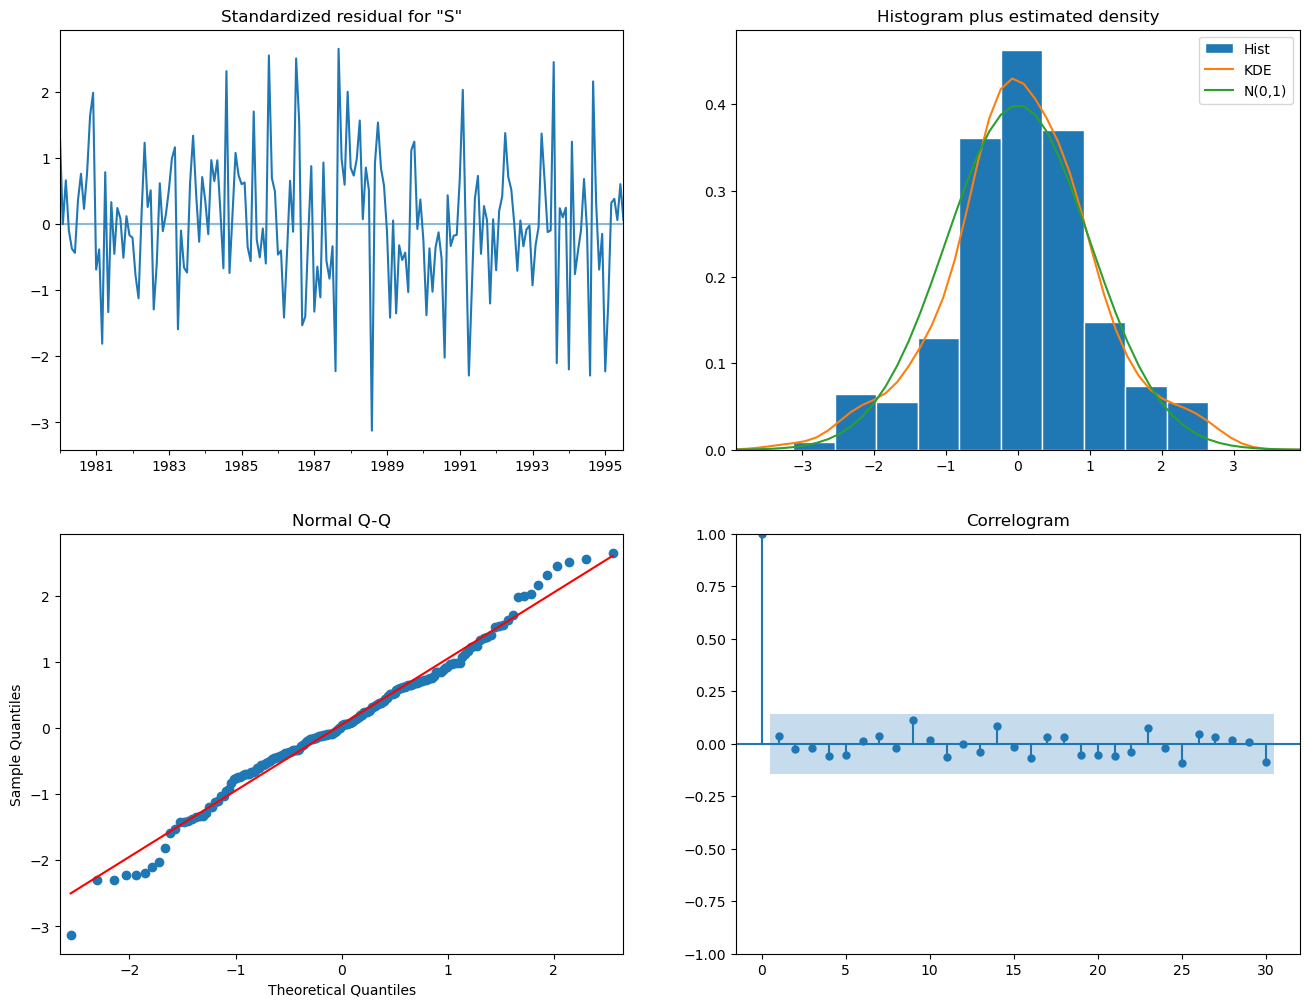

In [187]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()